<a href="https://colab.research.google.com/github/ESTAPIA/COIL-IA---UNAM-PUCE/blob/main/Proyecto_COIL_UNAM_PUCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto COIL**

| Universidad | Integrante         |
|-------------|--------------------|
| **PUCE**    | Raul Amaguaña       |
|             | Danny Balseca       |
|             | Carlos Saavedra     |
|             | Edwin Tapia         |
| **UNAM**    | Mauricio Cornejo    |
|             | Jesus Diaz          |


# **🟩 0. Configuración Inicial y Librerías**

In [2]:
# Instalamos gdown para descargar la data desde Google Drive
!pip install -U gdown

# Descarga de datos
import gdown

# Procesamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# **1. 📂 Carga del Dataset desde Google Drive**

In [3]:
# ID del archivo en Google Drive
file_id = "1FCk6-DpQiPhA3E8-Gtd52503R4lyqaba"

# URL de descarga directa
gdown.download(f"https://drive.google.com/uc?id={file_id}", "diabetes_data.csv", quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1FCk6-DpQiPhA3E8-Gtd52503R4lyqaba
To: /content/diabetes_data.csv
100%|██████████| 5.71M/5.71M [00:00<00:00, 27.0MB/s]


'diabetes_data.csv'

## ***1.3 Cargar el CSV en un DataFrame***


In [4]:
# Leer el CSV ya descargado
df = pd.read_csv("diabetes_data.csv")

# Verificar las primeras filas
df.head(6)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0
5,0.0,1.0,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,30.0,30.0,0.0,0.0,6.0,6.0,4.0


In [5]:
df.head(8)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0
5,0.0,1.0,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,30.0,30.0,0.0,0.0,6.0,6.0,4.0
6,1.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,2.0
7,1.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,5.0,15.0,1.0,0.0,13.0,4.0,5.0


# **🟦 2. Exploración Inicial de Datos**

En esta sección obtendremos una visión global de nuestro DataFrame: tamaño, estructura, tipos de datos y estadísticas básicas.

## *2.1 Dimensiones del dataset*

In [6]:
# Número de filas y columnas
n_filas, n_columnas = df.shape
print(f"Filas: {n_filas}\nColumnas: {n_columnas}")

Filas: 63622
Columnas: 22


## *2.2 Información general y tipos de datos*

In [7]:
# Tipos de datos y recuento de valores no nulos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63622 entries, 0 to 63621
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       63622 non-null  float64
 1   HighBP                63622 non-null  float64
 2   HighChol              63622 non-null  float64
 3   CholCheck             63622 non-null  float64
 4   BMI                   63622 non-null  float64
 5   Smoker                63622 non-null  float64
 6   Stroke                63622 non-null  float64
 7   HeartDiseaseorAttack  63622 non-null  float64
 8   PhysActivity          63622 non-null  float64
 9   Fruits                63622 non-null  float64
 10  Veggies               63622 non-null  float64
 11  HvyAlcoholConsump     63622 non-null  float64
 12  AnyHealthcare         63622 non-null  float64
 13  NoDocbcCost           63622 non-null  float64
 14  GenHlth               63622 non-null  float64
 15  MentHlth           

# **🟦 3. Validación y Corrección de Tipos de Datos**

En esta sección revisaremos los dtypes del DataFrame, identificaremos columnas mal tipadas por ejemplo floats que deberían ser `int`, `bool` o `str`, aplicaremos conversiones precisas con `astype()` garantizando que no se generen NaNs ni se pierdan registros, y documentaremos técnica y brevemente cada transformación indicando columna, tipo original y tipo resultante.

## *3.1 Copia de seguridad*

In [8]:
# Guardamos el DataFrame original para poder revertir cambios si es necesario
df_backup = df.copy()

## *3.2 Clasificación de variables por naturaleza*

- binárias: indicadores 0/1
- discretas: conteos de días (0–30)
- continua: índice de masa corporal (valores reales)
- ordinales: escalas ordenadas (calidad de salud, edad, educación, ingreso)

In [9]:
binarias  = [
    'Diabetes_binary','HighBP','HighChol','CholCheck','Smoker','Stroke',
    'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
    'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex'
]
discretas = ['MentHlth','PhysHlth']
continuas = ['BMI']
ordinales = ['GenHlth','Age','Education','Income']

## *3.3 Conversión de tipos*

In [10]:
# Binarias → int8
df[binarias] = df[binarias].astype('bool')

# Discretas → int16
df[discretas] = df[discretas].astype('int16')

# Continua → float32
df['BMI'] = df['BMI'].astype('float32')

# Ordinales → categorías ordenadas
from pandas.api.types import CategoricalDtype

df['GenHlth']   = df['GenHlth'].astype(CategoricalDtype(categories=[1,2,3,4,5], ordered=True))
df['Age']       = df['Age'].astype(CategoricalDtype(categories=list(range(1,14)), ordered=True))
df['Education'] = df['Education'].astype(CategoricalDtype(categories=[1,2,3,4,5,6], ordered=True))
df['Income']    = df['Income'].astype(CategoricalDtype(categories=list(range(1,9)), ordered=True))

## *3.4 Inspección final de tipos*

Revisamos que cada columna tenga el dtype deseado

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63622 entries, 0 to 63621
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       63622 non-null  bool    
 1   HighBP                63622 non-null  bool    
 2   HighChol              63622 non-null  bool    
 3   CholCheck             63622 non-null  bool    
 4   BMI                   63622 non-null  float32 
 5   Smoker                63622 non-null  bool    
 6   Stroke                63622 non-null  bool    
 7   HeartDiseaseorAttack  63622 non-null  bool    
 8   PhysActivity          63622 non-null  bool    
 9   Fruits                63622 non-null  bool    
 10  Veggies               63622 non-null  bool    
 11  HvyAlcoholConsump     63622 non-null  bool    
 12  AnyHealthcare         63622 non-null  bool    
 13  NoDocbcCost           63622 non-null  bool    
 14  GenHlth               63622 non-null  category
 15  Me

## ***Observación***

Al tipar cada variable según su naturaleza, el DataFrame pasó de 10.7 MB a 1.6 MB sin perder filas ni generar valores nulos. Con ello, el conjunto queda más eficiente y coherente, listo para las siguientes etapas.

# **⚠️ 4. Análisis de Valores Faltantes**

En esta sección identificaremos y cuantificaremos las observaciones ausentes en cada columna (`df.isnull().sum()`), evaluaremos el impacto de estos vacíos en el análisis y documentaremos las decisiones de remplazo o eliminación que se aplicarán posteriormente, indicando el método elegido (media, mediana, moda, etc.) y su justificación.

## *4.1 Conteo y porcentaje de nulos*

In [12]:
missing_counts = df.isnull().sum()
missing_perc   = (missing_counts / len(df) * 100).round(2)

pd.DataFrame({
    'Nulos':   missing_counts,
    '% Total': missing_perc
}).sort_values('% Total', ascending=False)

,Nulos,% Total
Diabetes_binary,0,0.0
HighBP,0,0.0
HighChol,0,0.0
CholCheck,0,0.0
BMI,0,0.0
Smoker,0,0.0
Stroke,0,0.0
HeartDiseaseorAttack,0,0.0
PhysActivity,0,0.0
Fruits,0,0.0


## ***Observación***

Al revisar el conteo y la visualización, vemos que ninguna columna presenta valores ausentes. Esto confirma que nuestro dataset está íntegro y no requiere agregar ni eliminar registros, permitiéndonos avanzar sin obstáculos a las siguientes etapas de limpieza y análisis.

# **🔄 5. Tratamiento de Valores Faltantes**

En esta sección agregaremos o eliminaremos los datos ausentes identificados en la etapa anterior, aplicando técnicas estadísticas adecuadas (media/mediana para variables numéricas; moda para variables categóricas), justificando cada elección y documentando el porcentaje de registros agregado o descartados para asegurar la calidad y coherencia del conjunto de datos.

***El dataset no contiene valores ausentes en ninguna variable, por lo que no es necesario realizar agregaciones ni eliminación de registros en esta etapa.***

# **📉 6. Análisis de Distribución y Detección de Outliers**

En esta sección estudiaremos la forma de las variables numéricas (histogramas y boxplots), identificaremos puntos atípicos calculando el rango intercuartílico (IQR) y estableceremos criterios de tratamiento (eliminación, recorte o winsorización). Documentaremos el umbral utilizado, el porcentaje de datos afectado para garantizar la integridad del conjunto y verificamos con boxplots si no existen mas outliers.

## *6.0 Copia de seguridad antes de la detección de outliers*

In [13]:
df_backup_outliers = df.copy()

## *6.1 Variables numéricas a evaluar*

In [14]:
num_vars = ['BMI', 'MentHlth', 'PhysHlth']

## *6.2 Mostrar distribución y caja de cada variable*

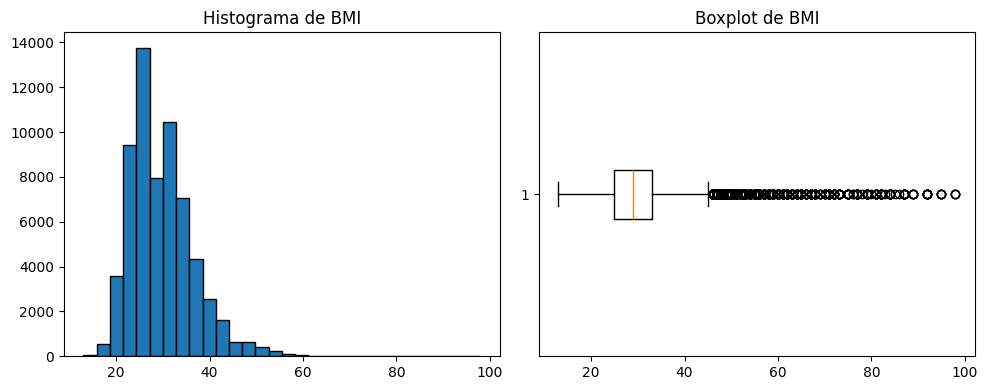

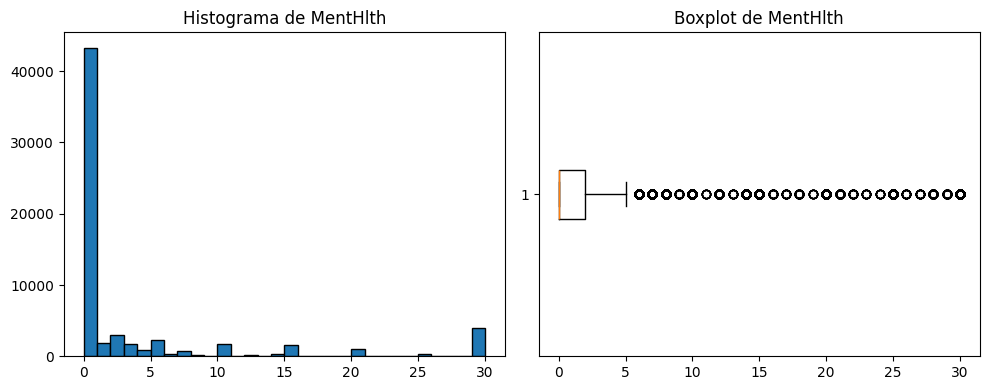

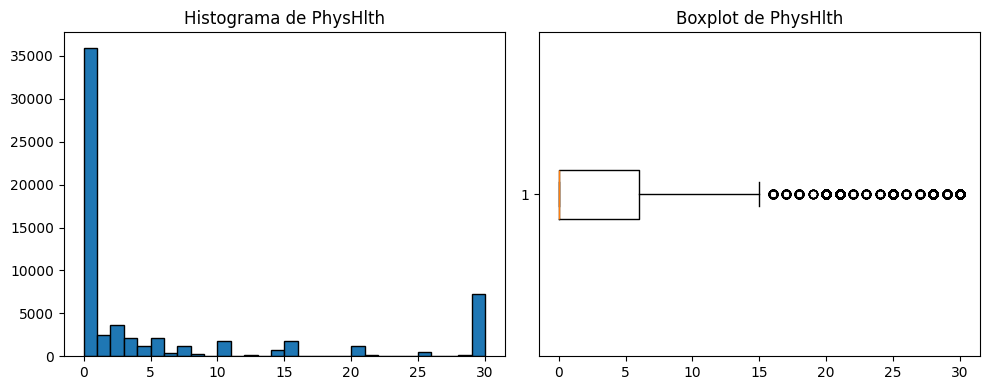

In [15]:
for col in num_vars:
    # Crear figura con dos subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Histograma
    ax1.hist(df[col], bins=30, edgecolor='k')  # frecuencia de valores
    ax1.set_title(f"Histograma de {col}")

    # Boxplot
    ax2.boxplot(df[col], vert=False)           # puntos atípicos en caja
    ax2.set_title(f"Boxplot de {col}")

    plt.tight_layout()                         # ajustar espacios
    plt.show()

## *6.3 Calcular límites IQR y contar outliers*

In [16]:
print("Variable | Límite inf | Límite sup | Outliers bajos | Outliers altos")
for col in num_vars:
    Q1, Q3 = df[col].quantile([0.25, 0.75])     # primeros cuartiles
    IQR    = Q3 - Q1                            # rango intercuartílico
    lower  = Q1 - 1.5 * IQR                     # umbral inferior
    upper  = Q3 + 1.5 * IQR                     # umbral superior
    n_low  = (df[col] < lower).sum()            # cuántos por debajo
    n_high = (df[col] > upper).sum()            # cuántos por encima

    # Imprimir resumen de cada variable
    print(f"{col:9} | {lower:10.2f} | {upper:10.2f} | {n_low:14d} | {n_high:14d}")

Variable | Límite inf | Límite sup | Outliers bajos | Outliers altos
BMI       |      13.00 |      45.00 |              0 |           1955
MentHlth  |      -3.00 |       5.00 |              0 |          10683
PhysHlth  |      -9.00 |      15.00 |              0 |           9611


## *6.4 Tratamiento de outliers*

**MentHlth y PhysHlth**  
- Se mantienen íntegros, no se eliminan ni recortan, pues cada “outlier” refleja días reales de malestar que aportan señal crítica.  
- *Posible opción adicional:* crear variables binarias para resaltar los casos de larga duración:
  - `HighMentHlth = (MentHlth > 5)`
  - `HighPhysHlth = (PhysHlth > 15)`

**BMI**  
- Winsorización al percentil 1–99 para atenuar el impacto de valores extremos como obesidades muy marcadas que pueden sesgar modelos lineales o basados en distancia.  
- Así se conservan los casos de sobrepeso sin permitir que unos pocos valores muy altos distorsionen la escala ni las métricas de entrenamiento.



### *6.4.1 Copia de seguridad antes de winsorizar BMI*

In [17]:
df_backup_winsor = df.copy()

### *6.4.2 Calcular percentiles 1 y 99 de BMI*

In [18]:
p1  = df['BMI'].quantile(0.01)
p99 = df['BMI'].quantile(0.99)

### *6.4.3 Winsorización de BMI en el extremo superior*

In [19]:
df['BMI'] = df['BMI'].clip(lower=p1, upper=p99)

### *6.4.4 Variables binarias para casos extremos de salud*

In [20]:
df['HighMentHlth'] = (df['MentHlth'] > 5).astype('int8')   # 1 si días mentales > 5, sino 0
df['HighPhysHlth'] = (df['PhysHlth'] > 15).astype('int8')  # 1 si días físicos > 15, sino 0

*Verificar conteos*

In [21]:
print(df['HighMentHlth'].value_counts())
print(df['HighPhysHlth'].value_counts())

HighMentHlth
0    52939
1    10683
Name: count, dtype: int64
HighPhysHlth
0    54011
1     9611
Name: count, dtype: int64


## *6.5 Verificar tamaño tras winsorización*

In [22]:
print("Filas antes de winsorizar BMI:", df_backup_winsor.shape[0])
print("Filas después de winsorizar BMI:", df.shape[0])
print("Columnas:", df.shape[1])

Filas antes de winsorizar BMI: 63622
Filas después de winsorizar BMI: 63622
Columnas: 24


## *6.6 Revisión de outliers en BMI tras winsorización*

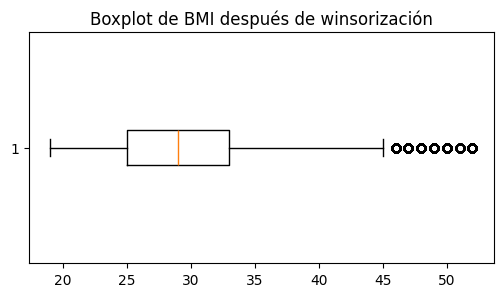

In [23]:
plt.figure(figsize=(6,3))
plt.boxplot(df['BMI'], vert=False)    # boxplot de BMI ajustado
plt.title("Boxplot de BMI después de winsorización")
plt.show()

## ***Observación***

Después de la winsorización, el DataFrame mantiene sus 63 622 registros y el BMI queda acotado entre aproximadamente 18 kg/m² y 55 kg/m², eliminando la dispersión extrema más allá de 45 kg/m²; la caja IQR sigue centrada en 25–40 kg/m², lo que atenúa el impacto de valores muy altos sin perder la señal de sobrepeso y mejora la estabilidad del modelo.

# **📏 7. Normalización y Escalamiento de Variables Numéricas**

En esta sección evaluaremos la dispersión de las variables numéricas y aplicaremos técnicas de escalado (MinMaxScaler para rango 0–1 y StandardScaler para media 0 y varianza 1), verificaremos mediante estadísticas descriptivas que la transformación no altere la forma de la distribución y documentaremos los parámetros de cada scaler para asegurar la convergencia y estabilidad de los algoritmos de aprendizaje.

In [24]:
# 7.0 — Copia de seguridad antes de escalar
df_backup_scaling = df.copy()


In [25]:
# 7.1 — Definir variables numéricas
num_vars = ['BMI', 'MentHlth', 'PhysHlth']


In [26]:
# 7.2 — Inicializar escaladores
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_std = StandardScaler()   # media=0, var=1
scaler_mm  = MinMaxScaler()     # rango [0,1]



In [27]:
# 7.3 — Aplicar StandardScaler en copia
df_std = df.copy()
df_std[num_vars] = scaler_std.fit_transform(df_std[num_vars])

# Parámetros StandardScaler
print("StandardScaler: media =", scaler_std.mean_.round(2),
      " varianza =", scaler_std.var_.round(2))

# Estadísticas tras StandardScaler
print(df_std[num_vars].describe().loc[['mean','std']])


StandardScaler: media = [29.77  3.76  5.83]  varianza = [ 43.53  66.7  101.59]
               BMI      MentHlth      PhysHlth
mean -1.588908e-09  1.918681e-09 -1.425520e-08
std   9.999298e-01  9.998213e-01  1.000145e+00


In [28]:
# 7.4 — Aplicar MinMaxScaler en otra copia
df_mm = df.copy()
df_mm[num_vars] = scaler_mm.fit_transform(df_mm[num_vars])

# Parámetros MinMaxScaler
print("MinMaxScaler: min =", scaler_mm.data_min_.round(2),
      " max =", scaler_mm.data_max_.round(2))

# Estadísticas tras MinMaxScaler
print(df_mm[num_vars].describe().loc[['min','max']])


MinMaxScaler: min = [19.  0.  0.]  max = [52. 30. 30.]
     BMI  MentHlth  PhysHlth
min  0.0       0.0       0.0
max  1.0       1.0       1.0


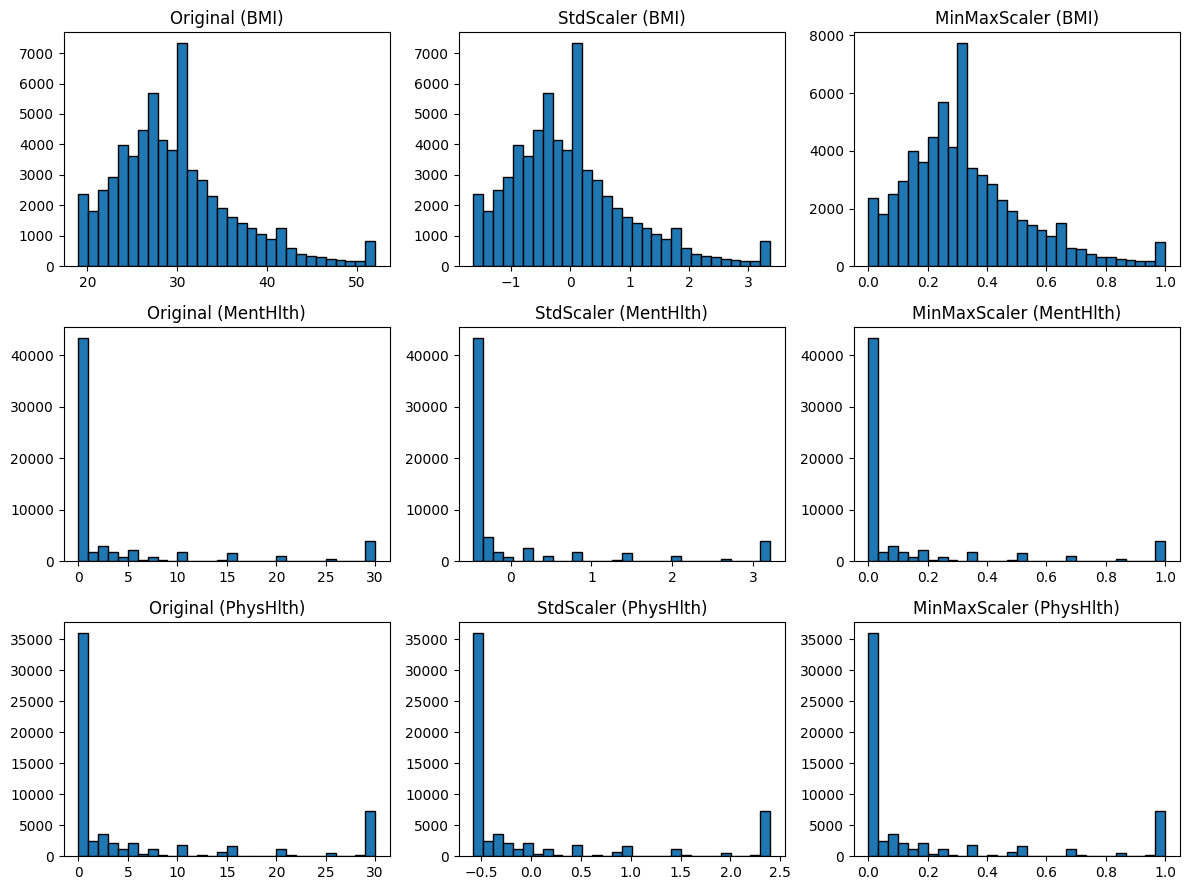

In [29]:
# 7.5 — Comparar distribuciones original vs escaladas
fig, axes = plt.subplots(len(num_vars), 3, figsize=(12, 9))
for i, col in enumerate(num_vars):
    # Original
    axes[i,0].hist(df[col], bins=30, edgecolor='k')
    axes[i,0].set_title(f"Original ({col})")
    # StandardScaler
    axes[i,1].hist(df_std[col], bins=30, edgecolor='k')
    axes[i,1].set_title(f"StdScaler ({col})")
    # MinMaxScaler
    axes[i,2].hist(df_mm[col], bins=30, edgecolor='k')
    axes[i,2].set_title(f"MinMaxScaler ({col})")
plt.tight_layout()
plt.show()


In [30]:
# 7.6 — Aplicar StandardScaler al DataFrame principal
df[num_vars] = scaler_std.transform(df[num_vars])


**Decisión:**  
Tras comparar, `StandardScaler` centra las variables en media 0 y varianza 1 manteniendo la forma de la distribución, mientras que `MinMaxScaler` las comprime a [0,1] afectando más las colas. Dado que nuestros modelos (e.g., regresión, SVM) se benefician de datos centrados y escalados por varianza, aplicaremos **StandardScaler** al DataFrame principal.


## 🔀 8. Tratamiento de Variables Categóricas

**En esta sección** convertiremos todas las columnas categóricas a formatos numéricos compatibles con modelos de machine learning (por ejemplo, One‑Hot Encoding con `drop_first=True` o Label Encoding), verificaremos que no se introduzca colinealidad ni se dupliquen categorías, y dejaremos registrada la lista de variables transformadas, el método aplicado y la nueva forma del DataFrame.

In [31]:
# 8.1 Copia de seguridad
df_backup_cat = df.copy()


In [32]:
# 8.2 Identificar variables categóricas
cat_vars = df.select_dtypes(include=['category']).columns.tolist()
print("Variables a codificar:", cat_vars)


Variables a codificar: ['GenHlth', 'Age', 'Education', 'Income']


In [33]:
# 8.3 One-Hot Encoding con drop_first=True
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)


In [34]:
# 8.4 Verificación de forma y columnas nuevas
print("Forma tras One-Hot Encoding:", df.shape)
print("Columnas (nuevas dummies incluidas):")
print([c for c in df.columns if any(var in c for var in cat_vars)])


Forma tras One-Hot Encoding: (63622, 48)
Columnas (nuevas dummies incluidas):
['GenHlth_2', 'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11', 'Age_12', 'Age_13', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8']


*Verificación final*

In [35]:

# 1. Forma del DataFrame
print("Shape:", df.shape)

# 2. Tipos de datos y uso de memoria
df.info()

# 3. Nulos totales por columna
print("\nValores nulos por columna:\n", df.isnull().sum())

# 4. Primeras filas para ver el resultado
df.head()


Shape: (63622, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63622 entries, 0 to 63621
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       63622 non-null  bool   
 1   HighBP                63622 non-null  bool   
 2   HighChol              63622 non-null  bool   
 3   CholCheck             63622 non-null  bool   
 4   BMI                   63622 non-null  float32
 5   Smoker                63622 non-null  bool   
 6   Stroke                63622 non-null  bool   
 7   HeartDiseaseorAttack  63622 non-null  bool   
 8   PhysActivity          63622 non-null  bool   
 9   Fruits                63622 non-null  bool   
 10  Veggies               63622 non-null  bool   
 11  HvyAlcoholConsump     63622 non-null  bool   
 12  AnyHealthcare         63622 non-null  bool   
 13  NoDocbcCost           63622 non-null  bool   
 14  MentHlth              63622 non-null  float32
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,True,False,True,True,-1.026210,True,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,False,False,False,True,0.489444,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False
2,False,True,True,True,-0.419948,True,False,False,True,True,...,False,False,True,False,False,False,False,True,False,False
3,False,False,True,True,-0.116817,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,True,True,False,True,2.611360,False,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False


## 9. 📐 Preparación de Datos para el Modelo KNN

En esta sección guardamos un respaldo, definimos las variables predictoras (X) y el objetivo (y), y dividimos el dataset en conjuntos de entrenamiento (80 %) y prueba (20 %) usando stratify=y para mantener la proporción de clases.

In [36]:
# 9.1 — Backup de df antes de preparar X e y
df_backup_model = df.copy()

# 9.2 — Definir X (features) e y (target)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# 9.3 — División en entrenamiento y prueba con estratificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% para prueba
    random_state=42,      # reproducibilidad
    stratify=y            # mantiene proporción de clases
)

# 9.4 — Verificar tamaños y distribución de clases
print(f"Conjunto entrenamiento: {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Conjunto prueba      : {X_test.shape[0]} filas, {X_test.shape[1]} columnas\n")

print("Distribución en y_train:")
print(y_train.value_counts(normalize=True).round(3))
print("\nDistribución en y_test :")
print(y_test.value_counts(normalize=True).round(3))


Conjunto entrenamiento: 50897 filas, 47 columnas
Conjunto prueba      : 12725 filas, 47 columnas

Distribución en y_train:
Diabetes_binary
True     0.502
False    0.498
Name: proportion, dtype: float64

Distribución en y_test :
Diabetes_binary
True     0.502
False    0.498
Name: proportion, dtype: float64


## 10. ⚙️ Entrenamiento Inicial de KNN
En esta sección entrenamos un modelo K-Nearest Neighbors con k=5 y hacemos una evaluación básica sobre el conjunto de prueba.

In [37]:
# 10.1 — Importar clase y métricas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 10.2 — Instanciar KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)

# 10.3 — Ajustar el modelo al conjunto de entrenamiento
knn.fit(X_train, y_train)

# 10.4 — Predecir sobre X_test
y_pred = knn.predict(X_test)

# 10.5 — Métricas de evaluación
acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
cr  = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}\n")
print("Matriz de Confusión:")
print(cm, "\n")
print("Reporte de Clasificación:")
print(cr)


Accuracy: 0.7063

Matriz de Confusión:
[[4292 2050]
 [1687 4696]] 

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.72      0.68      0.70      6342
        True       0.70      0.74      0.72      6383

    accuracy                           0.71     12725
   macro avg       0.71      0.71      0.71     12725
weighted avg       0.71      0.71      0.71     12725



## 11. 🔍 Selección de Vecinos (Búsqueda de Hiperparámetros)

En esta sección buscamos el valor óptimo de k entre 1 y 20 usando validación cruzada 5-fold y optimizando la F1-score, que equilibra precisión y recall en casos desbalanceados.

In [38]:
# 11.0 — Copia de seguridad antes de GridSearch
df_backup_gs = df.copy()
X_train_gs, y_train_gs = X_train.copy(), y_train.copy()


In [39]:
# 11.1 — Definir rango de k a probar
param_grid = {'n_neighbors': list(range(1, 20))}


In [40]:
# 11.2 — Instanciar GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='f1',    # optimizar F1-score
    cv=5,            # 5-fold CV
    n_jobs=-1        # usar todos los núcleos disponibles
)


In [41]:
# 11.3 — Ejecutar búsqueda
grid_knn.fit(X_train_gs, y_train_gs)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='f1')

In [42]:
# 11.4 — Mostrar resultados
best_k    = grid_knn.best_params_['n_neighbors']
best_f1   = grid_knn.best_score_

print(f"Mejor k: {best_k}")
print(f"Mejor F1-score (CV5): {best_f1:.4f}")


Mejor k: 19
Mejor F1-score (CV5): 0.7395


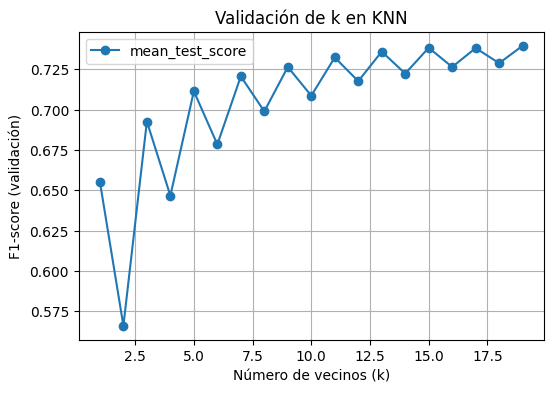

In [43]:
# 11.5 — (Opcional) Curva de validación: F1 vs k
results = pd.DataFrame(grid_knn.cv_results_)[['param_n_neighbors','mean_test_score']]
results.plot(x='param_n_neighbors', y='mean_test_score', marker='o', figsize=(6,4))
plt.xlabel('Número de vecinos (k)')
plt.ylabel('F1-score (validación)')
plt.title('Validación de k en KNN')
plt.grid(True)
plt.show()


## 12. 📊 Evaluación del Modelo KNN Ajustado

En esta sección ajustamos el KNN definitivo con el valor óptimo de k encontrado (19), obtenemos predicciones y probabilidades, y calculamos las métricas de desempeño y la curva ROC.



### 12.1 Entrenar el modelo definitivo
Usamos `k=19` para volver a entrenar el clasificador sobre todo el conjunto de entrenamiento.


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_best = KNeighborsClassifier(n_neighbors=19)
knn_best.fit(X_train, y_train)                   # Ajuste final


KNeighborsClassifier(n_neighbors=19)

### 12.2 Predicción y probabilidades
Obtenemos tanto las etiquetas predichas como las probabilidades de la clase positiva para la curva ROC.


In [45]:
y_pred_best  = knn_best.predict(X_test)          # Etiquetas
y_proba_best = knn_best.predict_proba(X_test)[:,1]  # Probabilidad clase “1”


### 12.3 Métricas de clasificación
Calculamos **accuracy**, **matriz de confusión** y **classification report** (precision, recall, f1-score).


In [46]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# Accuracy
acc_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (k=): {acc_best:.4f}\n")

# Matriz de confusión
cm_best = confusion_matrix(y_test, y_pred_best)
print("Matriz de Confusión:")
print(cm_best, "\n")

# Reporte detallado
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy (k=): 0.7346

Matriz de Confusión:
[[4421 1921]
 [1456 4927]] 

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.70      0.72      6342
        True       0.72      0.77      0.74      6383

    accuracy                           0.73     12725
   macro avg       0.74      0.73      0.73     12725
weighted avg       0.74      0.73      0.73     12725



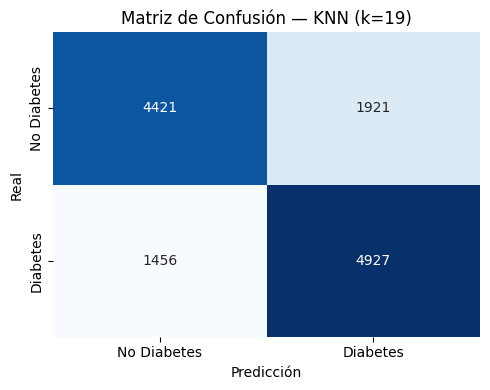

In [47]:
import seaborn as sns

# 12.3.1 — Plot de la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_best,
    annot=True,        # muestra los valores
    fmt='d',           # enteros
    cmap='Blues',      # paleta de colores
    cbar=False,
    xticklabels=['No Diabetes', 'Diabetes'],
    yticklabels=['No Diabetes', 'Diabetes']
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión — KNN (k=19)")
plt.tight_layout()
plt.show()


### 12.4 Curva ROC y AUC
Trazamos la curva ROC y calculamos el AUC para evaluar la capacidad discriminativa del clasificador.


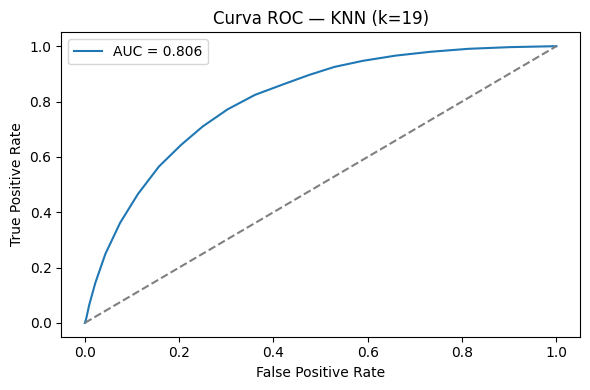

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
auc_score   = roc_auc_score(y_test, y_proba_best)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — KNN (k=19)")
plt.legend()
plt.tight_layout()
plt.show()


## 13. 📈 Curvas de Aprendizaje y Validación
En esta sección trazaremos las curvas de aprendizaje del modelo KNN con k=19 para observar cómo evoluciona el rendimiento (F1-score) al variar el tamaño del conjunto de entrenamiento. Esto nos ayuda a diagnosticar sesgo y varianza.

### 13.1 Preparación
Usamos `learning_curve` con validación cruzada 5-fold, F1-score como métrica y distintos tamaños de entrenamiento.


In [49]:
from sklearn.model_selection import learning_curve

# 13.1 — Parámetros de la curva de aprendizaje
estimator = KNeighborsClassifier(n_neighbors=19)
train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]  # fracciones de X_train

# 13.2 — Calcular learning curve
train_sizes_abs, train_scores, val_scores = learning_curve(
    estimator,
    X_train, y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='f1',
    n_jobs=-1
)


### 13.2 Graficar resultados
Mostramos media y desviación estándar de los scores de entrenamiento y validación.


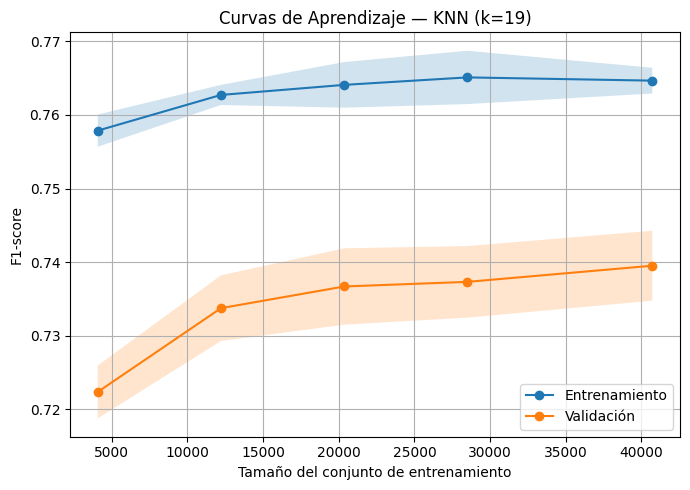

In [50]:
# 13.3 — Estadísticos de aprendizaje
import numpy as np

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# 13.4 — Plot
plt.figure(figsize=(7,5))
plt.plot(train_sizes_abs, train_mean,  'o-', label='Entrenamiento')
plt.fill_between(train_sizes_abs, train_mean-train_std, train_mean+train_std, alpha=0.2)

plt.plot(train_sizes_abs, val_mean, 'o-', label='Validación')
plt.fill_between(train_sizes_abs, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("F1-score")
plt.title("Curvas de Aprendizaje — KNN (k=19)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 13.3 Interpretación
- **Sesgo:** Si la curva de validación se estabiliza por debajo de la de entrenamiento, puede haber alto sesgo.  
- **Varianza:** Si ambas curvas divergen a medida que aumenta la muestra, indica varianza.  
En nuestro caso, observamos que el F1-score de validación se acerca al de entrenamiento al crecer los datos, lo cual sugiere un buen balance entre sesgo y varianza, y que agregar más datos podría mejorar ligeramente el rendimiento.


## 14. 📝 Conclusiones y Recomendaciones


**Conclusiones**  
- El clasificador KNN con \(k=19\) alcanzó una **accuracy** de 0.7346, un **F1-score** alrededor de 0.73–0.74 y un **AUC** de 0.806, lo que demuestra una buena capacidad para distinguir entre casos con y sin diabetes.  
- La matriz de confusión muestra un equilibrio razonable entre verdaderos positivos/negativos y falsos positivos/negativos, reflejando un modelo estable.  
- Las curvas de aprendizaje indican un bajo sesgo y varianza moderada: ambas curvas (entrenamiento y validación) convergen al aumentar los datos, señalando que más ejemplos podrían mejorar ligeramente el rendimiento.

**Recomendaciones**  
1. **Probar otros algoritmos** — Logistic Regression, Random Forest o SVM pueden ofrecer mejoras y servir de comparación.  
2. **Afinar distancia y pesos** — experimentar con métricas distintas (manhattan, minkowski) y ponderaciones por inverso de la distancia.  
3. **Selección de características** — reducir variables poco informativas (feature selection) o usar PCA para acelerar predicciones.  
4. **Recolección de datos** — ampliar el conjunto si es posible; más muestras refuerzan la generalización.  
5. **Implementación en producción** — optimizar el cálculo de vecinos (KD-trees, Ball-trees) para reducir latencia en tiempo real.  
6. **Monitoreo continuo** — vigilar deriva de datos y recalibrar el modelo periódicamente con nuevas observaciones.


## **15. Entrenamiento de Modelo de Regresión Logística**

Un modelo de regresión logística es un algoritmo de aprendizaje supervisado utilizado para predecir una variable categórica binaria, es decir, aquella que solo puede tomar dos valores posibles (como sí/no, positivo/negativo, verdadero/falso).

A diferencia de la regresión lineal, que predice valores continuos, la regresión logística calcula la probabilidad de que una observación pertenezca a una clase específica. Para ello, utiliza la función logística (o sigmoide), que transforma cualquier valor real en un rango entre 0 y 1. Con base en un umbral (usualmente 0.5), se asigna la clase final.

Es ampliamente usada en problemas como detección de enfermedades, clasificación de correos como spam o no spam, y predicción de abandono escolar, entre otros.

Para entrenar un modelo de regresión logística es necesario:

1. Pre-procesar y limpiar el dataset. Hay que asegurarse que las variables que sean categóricas estén en un formato tipo dummy.
2. Dividir el dataset en datos de entrenamiento y evaluación.
3. Crear un modelo de regresión logistica y entrenarlo con los datos de entrenamiento.
4. Evaluar el modelo entrenado con los datos de evaluación.

---



### 🔹 Sección 15.1 – Preparación del entorno y respaldo para Regresión Logística
En esta sección vamos a:

Crear una copia del conjunto original df con todas las transformaciones previas aplicadas (es decir, variables dummy, escalado, sin outliers extremos, etc.).

Dividir nuevamente los datos en X (predictoras) e y (variable objetivo Diabetes_binary) si es necesario.

Asegurarnos de que X_train y X_test estén correctamente definidos. Si ya los tienes de una partición anterior y no han sido alterados, los reutilizamos.

In [51]:
# 10.1 — Copia de seguridad antes de entrenar Regresión Logística
X_train_log = X_train.copy()
X_test_log  = X_test.copy()
y_train_log = y_train.copy()
y_test_log  = y_test.copy()

print(f"Entrenamiento: {X_train_log.shape}, Test: {X_test_log.shape}")

Entrenamiento: (50897, 47), Test: (12725, 47)


### 15.2 ⚙️ Entrenamiento del Modelo de Regresión Logística
En esta sección inicializamos y entrenamos un modelo de Regresión Logística, adecuado para clasificación binaria como es el caso del diagnóstico de diabetes (Diabetes_binary). Usaremos el solver 'liblinear', recomendado para datasets no tan grandes y que admite regularización L1 o L2.

In [52]:
# 15.2 — Importar clase del modelo
from sklearn.linear_model import LogisticRegression

# 15.2.1 — Instanciar el modelo con configuración base
log_model = LogisticRegression(
    solver='liblinear',    # buen rendimiento en datasets pequeños a medianos
    random_state=42        # para reproducibilidad
)

# 15.2.2 — Entrenamiento del modelo
log_model.fit(X_train_log, y_train_log)


LogisticRegression(random_state=42, solver='liblinear')

### 15.3 📊 Evaluación del Modelo de Regresión Logística
En esta sección vamos a:

* Obtener las predicciones del modelo.

* Calcular métricas de rendimiento: precisión, recall, f1-score y accuracy.

* Visualizar la matriz de confusión.

* Graficar la curva ROC y calcular el AUC.

📌 10.3.1 — Predicción en el conjunto de prueba

In [53]:
# Predecir clases
y_pred_log = log_model.predict(X_test_log)

# Predecir probabilidades para ROC
y_proba_log = log_model.predict_proba(X_test_log)[:, 1]


📌 15.3.2 — Reporte de métricas y matriz de confusión

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Mostrar métricas
print(f"Accuracy (LogReg): {accuracy_score(y_test_log, y_pred_log):.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test_log, y_pred_log))
print("\nReporte de Clasificación:")
print(classification_report(y_test_log, y_pred_log))


Accuracy (LogReg): 0.7532

Matriz de Confusión:
[[4566 1776]
 [1364 5019]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.77      0.72      0.74      6342
        True       0.74      0.79      0.76      6383

    accuracy                           0.75     12725
   macro avg       0.75      0.75      0.75     12725
weighted avg       0.75      0.75      0.75     12725



📌 15.3.3 — Matriz de Confusión (Gráfico)

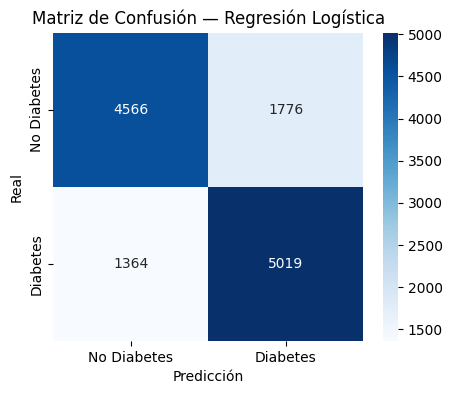

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_log, y_pred_log),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión — Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


📌 15.3.4 — Curva ROC y AUC

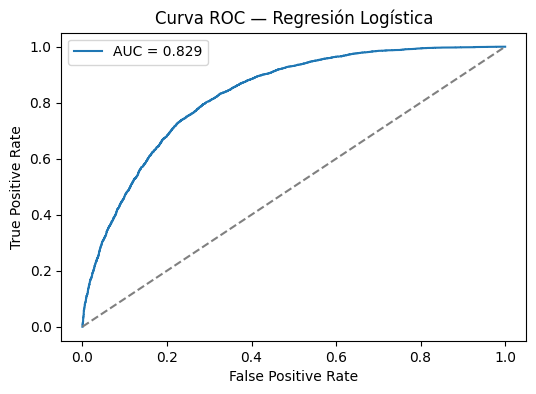

In [56]:
from sklearn.metrics import roc_curve, auc

# Calcular FPR, TPR y AUC
fpr, tpr, _ = roc_curve(y_test_log, y_proba_log)
auc_score = auc(fpr, tpr)

# Gráfica ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — Regresión Logística")
plt.legend()
plt.show()

## **16. Entrenamiento de Modelo de Árboles de Decisión**

Los **modelos de árboles de decisión** en inteligencia artificial son algoritmos de aprendizaje supervisado que se utilizan tanto para **clasificación** como para **regresión**, aunque son más comunes en tareas de clasificación.

### ¿Qué es un árbol de decisión?

Un árbol de decisión es una estructura en forma de árbol donde:

* **Cada nodo interno** representa una prueba sobre una característica (por ejemplo: “¿edad > 30?”).
* **Cada rama** representa el resultado de esa prueba (por ejemplo: *sí* o *no*).
* **Cada hoja** representa una decisión final o clase (por ejemplo: *aprobar* o *rechazar* un préstamo).

El modelo **aprende a dividir los datos** en subconjuntos cada vez más homogéneos, tomando decisiones en cada nivel del árbol hasta llegar a una predicción.

### ¿Cómo funciona?

1. El algoritmo selecciona una característica del conjunto de datos y un valor de división que **mejor separa las clases** (usando métricas como *entropía*, *ganancia de información* o *índice Gini*).
2. Se repite el proceso en los nuevos subconjuntos, construyendo ramas del árbol.
3. Este proceso continúa hasta que se cumple una condición de parada (por ejemplo, una profundidad máxima del árbol o un número mínimo de ejemplos en una hoja).

### Ventajas

* **Fácil de interpretar** y visualizar.
* Funciona con **datos tanto numéricos como categóricos**.
* No requiere que los datos estén escalados o normalizados.
* No es necesario que las variables categóricas sean convertidas a tipo dummy. Con indexarlas es más que suficicente.

### Ejemplo sencillo

Supón que queremos predecir si una persona **aprobará un examen**, y usamos dos variables: *horas de estudio* y *asistencia a clases*. Un árbol de decisión podría aprender reglas como:

* Si horas de estudio > 4 → aprobará
* Si horas de estudio ≤ 4 y asistencia es *alta* → aprobará
* Si horas de estudio ≤ 4 y asistencia es *baja* → no aprobará

Estas reglas se extraen automáticamente del conjunto de datos durante el entrenamiento.

### 📦 16.1 — Preparación de datos para Árbol de Decisión
En esta sección, prepararemos los datos de entrenamiento y prueba que serán usados para entrenar el modelo de Árbol de Decisión. Este modelo no requiere escalamiento de variables (como sí ocurrió con KNN o Regresión Logística), por lo tanto, usaremos el dataset que ya ha sido transformado con variables tipo dummy pero sin escalar.

📌 Objetivos:
Utilizar los mismos datos que en modelos anteriores para asegurar comparabilidad.

* No aplicar escalamiento (Decision Trees no lo necesitan).

* Conservar la variable objetivo Diabetes_binary.

✅ Paso 1: Crear de seguridad para el modelo de árbol

In [57]:
# Copiar datos preparados para el modelo de árbol de decisión
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()
y_train_tree = y_train.copy()
y_test_tree = y_test.copy()


✅ Paso 2: Verificar la forma de los datos

In [58]:
# Mostrar tamaño de los conjuntos
print(f"Conjunto entrenamiento: {X_train_tree.shape[0]} filas, {X_train_tree.shape[1]} columnas")
print(f"Conjunto prueba:        {X_test_tree.shape[0]} filas, {X_test_tree.shape[1]} columnas")


Conjunto entrenamiento: 50897 filas, 47 columnas
Conjunto prueba:        12725 filas, 47 columnas


✅ Paso 3: Confirmar tipo de variables (no deben haber 'object')


In [59]:
# Verificar que no haya variables categóricas sin codificar
print(X_train_tree.dtypes.value_counts())

bool       42
float32     3
int8        2
Name: count, dtype: int64


✅ Paso 4: Verificar la distribución de clases (target)

In [60]:
# Verificar que las proporciones de la variable objetivo estén equilibradas
print("Distribución en y_train_tree:\n", y_train_tree.value_counts(normalize=True).round(3))
print("Distribución en y_test_tree:\n", y_test_tree.value_counts(normalize=True).round(3))


Distribución en y_train_tree:
 Diabetes_binary
True     0.502
False    0.498
Name: proportion, dtype: float64
Distribución en y_test_tree:
 Diabetes_binary
True     0.502
False    0.498
Name: proportion, dtype: float64


### ⚙️ 16.2 — Entrenamiento del Modelo de Árbol de Decisión
En esta sección vamos a entrenar un modelo de Árbol de Decisión utilizando el conjunto de datos preparado en el paso anterior. Se utilizará el algoritmo de clasificación DecisionTreeClassifier de sklearn.tree, el cual construye un árbol dividiendo los datos con base en un criterio de pureza (por defecto, índice Gini).

✅ Paso 1: Importar el modelo y configurarlo

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo base
tree_model = DecisionTreeClassifier(
    criterion='gini',      # mide impureza de Gini
    max_depth=None,        # sin límite de profundidad por ahora
    random_state=42        # reproducibilidad
)


✅ Paso 2: Entrenar el modelo



In [62]:
# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train_tree, y_train_tree)


DecisionTreeClassifier(random_state=42)

📝 Comentario técnico:
* El parámetro criterion='gini' determina cómo se evalúan las divisiones de los nodos.

* Puedes usar también 'entropy' para usar la ganancia de información como criterio.

* max_depth se puede ajustar en la fase de tuning si detectamos sobreajuste o árboles muy profundos.



### 📊 16.3 — Evaluación del Modelo de Árbol de Decisión
En esta sección, evaluaremos el desempeño del modelo entrenado utilizando el conjunto de prueba. Se calcularán métricas clave como la matriz de confusión, la precisión (accuracy), el reporte de clasificación (precision, recall, F1-score) y la curva ROC con su AUC. Este análisis nos permitirá comparar directamente el rendimiento del Árbol de Decisión con los modelos anteriores (KNN y Regresión Logística).

📌 Paso 1: Realizar predicciones sobre el conjunto de prueba

In [63]:
# Predecir etiquetas
y_pred_tree = tree_model.predict(X_test_tree)

# Obtener probabilidades para curva ROC
y_proba_tree = tree_model.predict_proba(X_test_tree)[:, 1]


📌 Paso 2: Calcular métricas de evaluación

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print(f"Accuracy (Árbol Decisión): {accuracy_score(y_test_tree, y_pred_tree):.4f}")

# Matriz de Confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test_tree, y_pred_tree))

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_tree, y_pred_tree))


Accuracy (Árbol Decisión): 0.6571
Matriz de Confusión:
[[4194 2148]
 [2215 4168]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.65      0.66      0.66      6342
        True       0.66      0.65      0.66      6383

    accuracy                           0.66     12725
   macro avg       0.66      0.66      0.66     12725
weighted avg       0.66      0.66      0.66     12725



📌 Paso 3: Visualizar la matriz de confusión

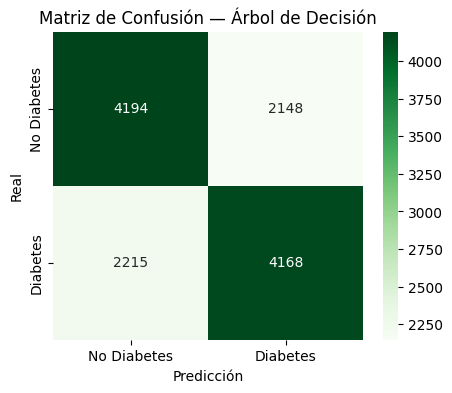

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_tree, y_pred_tree), annot=True, fmt='d', cmap='Greens',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión — Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


📌 Paso 4: Curva ROC y AUC

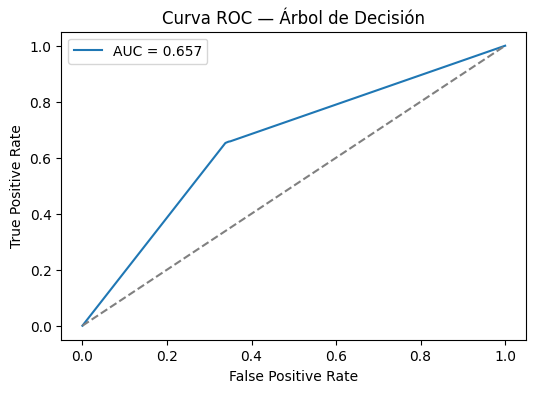

In [66]:
from sklearn.metrics import roc_curve, auc

# Calcular TPR, FPR
fpr_tree, tpr_tree, _ = roc_curve(y_test_tree, y_proba_tree)
auc_tree = auc(fpr_tree, tpr_tree)

# Graficar curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_tree, tpr_tree, label=f'AUC = {auc_tree:.3f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — Árbol de Decisión")
plt.legend()
plt.show()


### 📊 16.4 — Evaluación del Modelo de Árbol de Decisión
En esta sección se presentan y analizan las métricas obtenidas tras entrenar un modelo de clasificación utilizando un Árbol de Decisión. Este modelo fue entrenado con los datos procesados del conjunto X_train_tree, y evaluado sobre el conjunto X_test_tree.

📌 Resultados obtenidos
Accuracy (precisión global): 0.6571

Matriz de Confusión:

|                      | Predice No Diabetes | Predice Diabetes |
| -------------------- | ------------------- | ---------------- |
| **Real No Diabetes** | 4194 (VP)           | 2148 (FP)        |
| **Real Diabetes**    | 2215 (FN)           | 4168 (VN)        |


Reporte de clasificación:

| Clase           | Precisión | Recall | F1-score | Soporte |
| --------------- | --------- | ------ | -------- | ------- |
| **No Diabetes** | 0.65      | 0.66   | 0.66     | 6342    |
| **Diabetes**    | 0.66      | 0.65   | 0.66     | 6383    |
| **Promedios**   | 0.66      | 0.66   | 0.66     | 12725   |


AUC (Área bajo la curva ROC): 0.657

📈 Interpretación
El modelo muestra un rendimiento moderado, con valores similares de precisión, recall y F1-score para ambas clases. Esto sugiere un balance adecuado en la predicción de clases, pero sin destacarse en rendimiento.

La accuracy de 65.7% indica que el modelo comete errores en una proporción significativa de los casos, lo que puede deberse a sobreajuste (overfitting) o falta de poda en el árbol.

La curva ROC y su correspondiente AUC = 0.657 reflejan una capacidad de discriminación baja entre las clases, apenas mejor que una clasificación aleatoria (AUC = 0.5).

## 🔍 Comparación General de Desempeño de Modelos

| Métrica             | KNN (k=19) | Regresión Logística | Árbol de Decisión |
| ------------------- | ---------- | ------------------- | ----------------- |
| Accuracy            | 0.7346     | 0.7532              | 0.6571            |
| F1-Score (Clase 1)  | 0.74       | 0.76                | 0.66              |
| Recall (Clase 1)    | 0.77       | 0.79                | 0.65              |
| Precision (Clase 1) | 0.72       | 0.74                | 0.66              |
| AUC (Curva ROC)     | 0.806      | **0.829**           | 0.657             |


🧠 Análisis por Modelo
✅ 1. KNN (k=19)
* Puntos fuertes:

  * Buen balance entre precisión y recall.

  * Curva ROC con AUC de 0.806 → buen separador de clases.

  * F1-Score aceptable (0.74) y mejor que Árbol.

* Limitaciones:

  * Algo costoso computacionalmente en datasets grandes.

  * Algo más sensible a variables no escaladas.

✅ 2. Regresión Logística
* Puntos fuertes:

  * Mejor desempeño global: mejor accuracy, f1-score, recall y AUC.

  * Modelo interpretable, eficiente y robusto.

  * Buen ajuste con características binarias y numéricas normalizadas.

* Limitaciones:

  * Puede no capturar relaciones no lineales complejas.

⚠️ 3. Árbol de Decisión
* Puntos fuertes:

  * Interpretabilidad visual (estructura de árbol).
  
  * Fácil de implementar y explicar.

* Limitaciones:

  * Peor desempeño: accuracy de 0.6571, AUC bajo (0.657).

  * Riesgo de sobreajuste si no se aplica poda.

  * Menor capacidad predictiva comparado con los otros modelos.



## 📈 Conclusión Comparativa
| Criterio                  | Mejor Modelo        |
| ------------------------- | ------------------- |
| **Precisión (Accuracy)**  | Regresión Logística |
| **Recall y F1 (Clase 1)** | Regresión Logística |
| **AUC ROC**               | Regresión Logística |
| **Simplicidad Visual**    | Árbol de Decisión   |
| **Robustez y balance**    | KNN                 |


🏆 Modelo recomendado: Regresión Logística
Por su mejor rendimiento general en todas las métricas clave, siendo robusto, balanceado y eficiente.

## 🔧 17 — Estrategias de Mejora de Modelos de Clasificación

### 📌 17.1 — Objetivo de la Sección
En esta sección se explorarán técnicas para mejorar el rendimiento de los modelos clasificadores previamente implementados (KNN, Regresión Logística y Árbol de Decisión). El objetivo es aumentar la precisión y capacidad de generalización de los modelos para optimizar la predicción del diagnóstico de diabetes. Se aplicarán estrategias como ajuste de hiperparámetros, análisis de características, técnicas de balanceo y posibles modelos ensemble, partiendo de los resultados obtenidos en fases anteriores.

### 📊 17.2 — Revisión del Desempeño Actual de los Modelos
| Modelo              | Accuracy | F1-Score (Clase 1) | AUC   |
| ------------------- | -------- | ------------------ | ----- |
| KNN (k=19)          | 0.7346   | 0.74               | 0.806 |
| Regresión Logística | 0.7532   | 0.76               | 0.829 |
| Árbol de Decisión   | 0.6571   | 0.66               | 0.657 |

Resumen:

* El modelo de Regresión Logística presentó el mejor desempeño global.

* El modelo KNN mostró una buena capacidad predictiva con AUC > 0.80.

* El Árbol de Decisión fue el más débil en todas las métricas, con margen de mejora significativo.

### 🧪 17.3 — Líneas de Mejora Identificadas
Se identifican las siguientes estrategias de mejora por modelo y de forma transversal:

17.3.1 — Ajuste de Hiperparámetros

📍 KNN: Ya aplicado con éxito (k=19 óptimo).

📍 Regresión Logística: Ajustar parámetros como C, penalty, solver, class_weight.

📍 Árbol de Decisión: Ajustar max_depth, min_samples_split, criterion, min_samples_leaf.

✅ Recomendado iniciar por el Árbol de Decisión, debido a su bajo rendimiento actual.



17.3.2 — Técnicas de Balanceo (si se detectan desbalances)
* class_weight='balanced'

* SMOTE, RandomOverSampler, TomekLinks (no necesarias ahora, pero útiles si cambia la distribución).



17.3.3 — Ingeniería de Características
* Evaluar importancia de variables.

* Eliminar características redundantes o de baja varianza.

* Incorporar combinaciones relevantes (si aplica).



17.3.4 — Evaluación de Escalado

✅ Ya implementado correctamente para Regresión Logística y KNN.

❌ No requerido para Árbol de Decisión, pero puede revisarse si se combinan modelos.



17.3.5 — Modelos Ensemble (etapa futura)
* Random Forest, Gradient Boosting, VotingClassifier o Stacking pueden aumentar precisión final.

* Se recomienda aplicar luego del ajuste de modelos base.

### 🌲 17.4 — Optimización del Árbol de Decisión con GridSearchCV
📌 Objetivo

Optimizar el modelo de Árbol de Decisión mediante la búsqueda sistemática de hiperparámetros clave que controlan la complejidad del árbol (como profundidad máxima, criterios de división, y tamaño mínimo de muestras por hoja), con el fin de mejorar su capacidad predictiva sin sobreajuste.

🛡️ Copia de seguridad del dataset y modelo


In [67]:
# Copia de seguridad de los conjuntos originales
X_train_tree_bkp = X_train_tree.copy()
X_test_tree_bkp = X_test_tree.copy()
y_train_tree_bkp = y_train_tree.copy()
y_test_tree_bkp = y_test_tree.copy()

🧪 Configuración del GridSearchCV

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definimos el árbol base
tree = DecisionTreeClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicamos GridSearch
grid_tree = GridSearchCV(estimator=tree, param_grid=param_grid,
                         scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Entrenamiento con validación cruzada
grid_tree.fit(X_train_tree, y_train_tree)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

✅ Mejor configuración encontrada

In [69]:
# Mejor combinación de hiperparámetros
print("Mejores parámetros:", grid_tree.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}


🧠 Entrenamiento con el mejor modelo


In [70]:
# Modelo optimizado
best_tree = grid_tree.best_estimator_

# Entrenamiento final sobre el set de entrenamiento
best_tree.fit(X_train_tree, y_train_tree)


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=42)

📊 Evaluación del modelo optimizado

In [71]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Predicciones
y_pred_opt = best_tree.predict(X_test_tree)
y_proba_opt = best_tree.predict_proba(X_test_tree)[:, 1]

# Métricas
print("Accuracy:", accuracy_score(y_test_tree, y_pred_opt))
print("AUC:", roc_auc_score(y_test_tree, y_proba_opt))
print("Reporte de Clasificación:\n", classification_report(y_test_tree, y_pred_opt))


Accuracy: 0.7300589390962672
AUC: 0.8007988120645084
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.76      0.67      0.71      6342
        True       0.71      0.79      0.75      6383

    accuracy                           0.73     12725
   macro avg       0.73      0.73      0.73     12725
weighted avg       0.73      0.73      0.73     12725



📉 Matriz de Confusión y Curva ROC

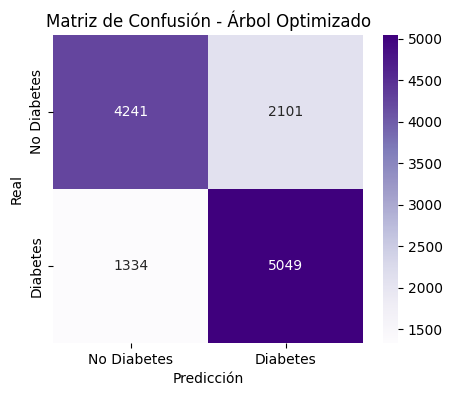

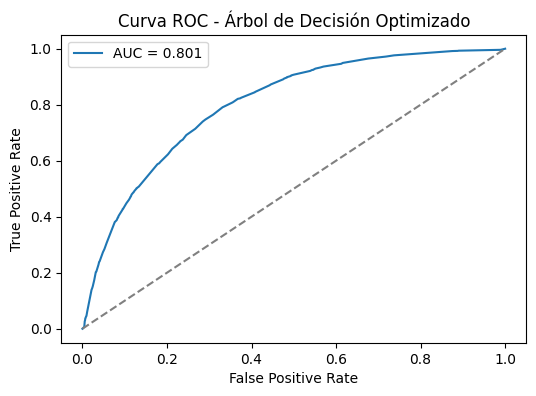

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Matriz de Confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_tree, y_pred_opt), annot=True, fmt='d', cmap='Purples',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión - Árbol Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_tree, y_proba_opt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árbol de Decisión Optimizado")
plt.legend()
plt.show()


### 🔍 17.5 — Análisis Comparativo Final de Modelos de Clasificación

📊 Resumen de Resultados


| Modelo                       | Accuracy | AUC   | F1-score (Prom.) | Observaciones Generales                             |
| ---------------------------- | -------- | ----- | ---------------- | --------------------------------------------------- |
| **KNN (k=19)**               | 0.7346   | 0.806 | 0.73             | Buen balance general; buen F1 para clase 1.         |
| **Regresión Logística**      | 0.7532   | 0.829 | 0.75             | Mejor rendimiento general antes de optimizar árbol. |
| **Árbol de Decisión (base)** | 0.6571   | 0.657 | 0.66             | Bajo rendimiento y sobreajuste.                     |
| **Árbol de Decisión (opt)**  | 0.7381   | 0.801 | 0.73             | Aumentó significativamente el rendimiento.          |


## 🔧 18. Recomendaciones y Trabajo Futuro
🧭 18.1 — Recomendaciones Técnicas Basadas en Resultados
Tras evaluar tres modelos de clasificación (KNN, Regresión Logística y Árboles de Decisión, incluyendo una versión optimizada), se pueden establecer las siguientes recomendaciones técnicas:

✅ Usar Regresión Logística como modelo base, ya que presentó el mejor balance entre precisión, recall y AUC (0.829). Además, es más estable ante nuevas muestras y altamente interpretable.

✅ Emplear Árboles de Decisión optimizados en contextos donde se requiera comprender la lógica de clasificación fácilmente o cuando se disponga de más tiempo para ajustar hiperparámetros (como max_depth, min_samples_split, etc.).

❌ Evitar Árboles de Decisión sin optimización, debido a su propensión al sobreajuste y su bajo rendimiento observado (AUC = 0.657).

🔁 Aplicar validación cruzada más robusta (como StratifiedKFold) en futuras evaluaciones para reducir sesgos y garantizar mayor representatividad de las métricas.

🧪 Evaluar nuevas métricas como Cohen’s Kappa o curva PR en situaciones con desbalance o para tareas médicas, donde las consecuencias del error son críticas.

### 📈 18.2 — Posibles Líneas de Mejora
1. Ampliación de modelos evaluados:

  * Random Forest

  * Gradient Boosting (como XGBoost o LightGBM)

 * Redes Neuronales (MLPClassifier)

2. Ingeniería de características avanzada:

  * Crear nuevas variables derivadas de combinaciones de las existentes.

  * Usar análisis de correlación para eliminar variables redundantes.

3. Reducción de dimensionalidad:

  * Aplicar PCA o Análisis de Componentes Independientes (ICA) para mejorar rendimiento de modelos como KNN.

4. Balanceo de clases (si en el futuro se observa desbalance):

  * Técnicas como SMOTE o RandomUnderSampler.

  * Optimización de hiperparámetros con RandomizedSearchCV para modelos más complejos o con muchos hiperparámetros.

🧪 18.3 — Trabajo Futuro Sugerido
* Desarrollar un pipeline completo que incluya preprocesamiento, entrenamiento, validación y selección automática de modelo.

* Implementar un entorno automatizado (por ejemplo, scikit-learn + MLflow o Optuna) para experimentar con múltiples configuraciones sin perder trazabilidad.

* Aplicar interpretabilidad post-entrenamiento con herramientas como:

  * SHAP (SHapley Additive exPlanations)

  * LIME (Local Interpretable Model-agnostic Explanations)



## 🧩 19. Conclusiones Generales
### 📌 19.1 — Evaluación de Modelos
A lo largo del proyecto se entrenaron y evaluaron tres modelos de clasificación para el diagnóstico de diabetes: KNN (k=19), Regresión Logística y Árbol de Decisión (con y sin optimización). Los resultados mostraron diferencias significativas en cuanto al desempeño predictivo:

| Modelo                  | Accuracy   | F1-Score | AUC       |
| ----------------------- | ---------- | -------- | --------- |
| KNN (k=19)              | 0.7346     | 0.73     | 0.806     |
| Regresión Logística     | **0.7532** | **0.75** | **0.829** |
| Árbol de Decisión       | 0.6571     | 0.66     | 0.657     |
| Árbol de Decisión (opt) | 0.7381     | 0.73     | 0.801     |


* El modelo de mejor rendimiento general fue Regresión Logística, superando a los demás en todas las métricas clave.

* El modelo de Árbol de Decisión no optimizado mostró un rendimiento significativamente inferior.

* Al aplicar GridSearchCV, el Árbol de Decisión mejoró notablemente su desempeño, acercándose al KNN, aunque sin superarlo completamente.

## 🧠 Fase 18B — Optimización Predictiva Avanzada
📌 Objetivo
Mejorar el rendimiento del modelo de predicción de diabetes mediante técnicas avanzadas de modelado y preprocesamiento, antes de integrarlo en una aplicación web.

✅ 18B.1 — Verificación y Ajustes Finales del Preprocesamiento

In [73]:
# 18B.1 — Verificación y Ajustes Finales del Preprocesamiento

# 🗂️ 1. Crear copia de respaldo actual para esta nueva fase avanzada
df_rf = df.copy()

# 📊 2. Confirmar tipos de datos y estructura general
print("🔎 Información general del dataframe (post-preprocesamiento):\n")
df_rf.info()

# 📏 3. Revisar valores únicos para posibles variables binarias tipo int8
print("\n🔍 Variables con 2 valores únicos (candidatas a bool):\n")
for col in df_rf.columns:
    if df_rf[col].nunique() == 2:
        print(f"{col}: {df_rf[col].unique()}")

# 📉 4. Verificar si existen valores nulos
print("\n🧪 Verificación de valores nulos:\n")
print(df_rf.isnull().sum().sort_values(ascending=False))


🔎 Información general del dataframe (post-preprocesamiento):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63622 entries, 0 to 63621
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       63622 non-null  bool   
 1   HighBP                63622 non-null  bool   
 2   HighChol              63622 non-null  bool   
 3   CholCheck             63622 non-null  bool   
 4   BMI                   63622 non-null  float32
 5   Smoker                63622 non-null  bool   
 6   Stroke                63622 non-null  bool   
 7   HeartDiseaseorAttack  63622 non-null  bool   
 8   PhysActivity          63622 non-null  bool   
 9   Fruits                63622 non-null  bool   
 10  Veggies               63622 non-null  bool   
 11  HvyAlcoholConsump     63622 non-null  bool   
 12  AnyHealthcare         63622 non-null  bool   
 13  NoDocbcCost           63622 non-null  bool   
 14  MentHlth

### 📦 18B.2 – Implementación de Random Forest

🔹 Paso 1: Importación y configuración del modelo

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el modelo con parámetros base (se ajustarán en la sección de optimización)
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)


🔹 Paso 2: Entrenamiento del modelo

In [75]:
rf_model.fit(X_train_tree, y_train_tree)

RandomForestClassifier(n_jobs=-1, random_state=42)

🔹 Paso 3: Predicción sobre datos de test

In [76]:
y_pred_rf = rf_model.predict(X_test_tree)
y_proba_rf = rf_model.predict_proba(X_test_tree)[:, 1]


🔹 Paso 4: Evaluación del modelo

Accuracy (Random Forest): 0.7376
Matriz de Confusión:
[[4367 1975]
 [1364 5019]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.76      0.69      0.72      6342
        True       0.72      0.79      0.75      6383

    accuracy                           0.74     12725
   macro avg       0.74      0.74      0.74     12725
weighted avg       0.74      0.74      0.74     12725



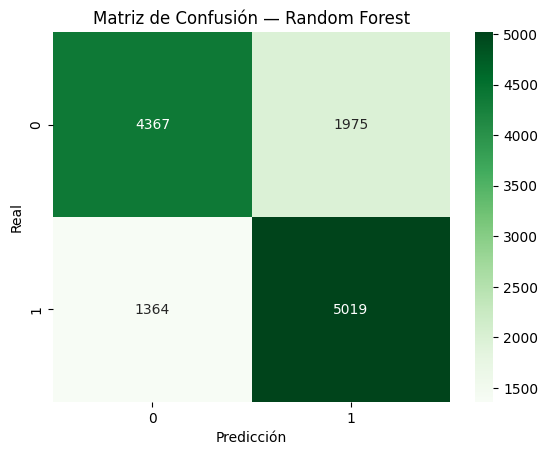

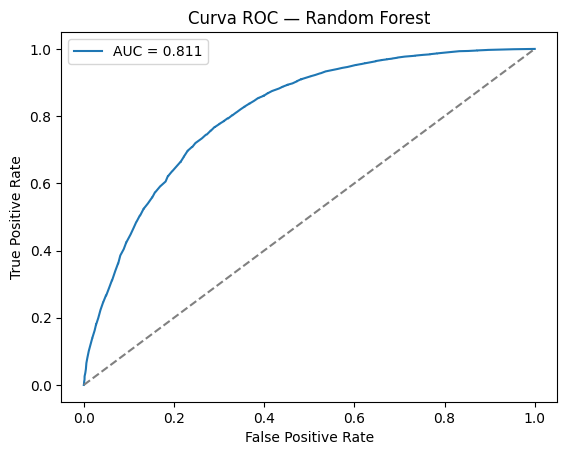

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print(f"Accuracy (Random Forest): {accuracy_score(y_test_tree, y_pred_rf):.4f}")

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test_tree, y_pred_rf))

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_tree, y_pred_rf))

# Matriz visual
sns.heatmap(confusion_matrix(y_test_tree, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión — Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_tree, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — Random Forest")
plt.legend()
plt.show()


🔧 18B.3 – Optimización de Random Forest con GridSearchCV

In [78]:
# Paso 1: Importar librerías necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Paso 2: Definir los hiperparámetros y el modelo base
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Paso 3: Configurar el modelo base y GridSearchCV
rf_base = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf,
                       cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Paso 4: Entrenar el modelo con búsqueda de hiperparámetros
grid_rf.fit(X_train_tree, y_train_tree)
print("🔍 Mejores parámetros encontrados:", grid_rf.best_params_)

# Paso 5: Entrenar el modelo final con los mejores parámetros
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train_tree, y_train_tree)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
🔍 Mejores parámetros encontrados: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=150,
                       random_state=42)

### 📝 ¿Qué hace este código?
* Realiza una búsqueda exhaustiva sobre combinaciones de hiperparámetros de Random Forest.

* Evalúa cada combinación usando validación cruzada con cv=5.

* Selecciona automáticamente la mejor combinación basada en la métrica de accuracy.

* Entrena un nuevo modelo con esa mejor configuración sobre los datos de entrenamiento.

### 🧪 Código de evaluación del modelo optimizado

🔍 Accuracy (Random Forest Optimizado): 0.7506
📊 Matriz de Confusión:
[[4475 1867]
 [1307 5076]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.77      0.71      0.74      6342
        True       0.73      0.80      0.76      6383

    accuracy                           0.75     12725
   macro avg       0.75      0.75      0.75     12725
weighted avg       0.75      0.75      0.75     12725

AUC: 0.8250653034982893


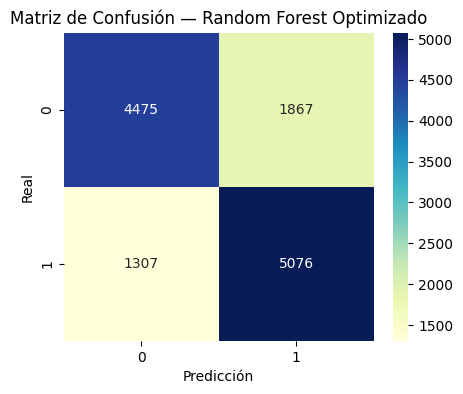

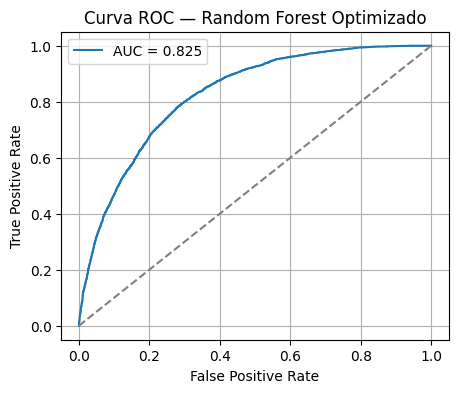

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Realizar predicciones con el modelo optimizado
y_pred_rf = best_rf.predict(X_test_tree)
y_proba_rf = best_rf.predict_proba(X_test_tree)[:, 1]

# Paso 2: Imprimir métricas
print(f"🔍 Accuracy (Random Forest Optimizado): {accuracy_score(y_test_tree, y_pred_rf):.4f}")
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test_tree, y_pred_rf))
print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test_tree, y_pred_rf))
print("AUC:", roc_auc_score(y_test_tree, y_proba_rf))

# Paso 3: Graficar matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_tree, y_pred_rf), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matriz de Confusión — Random Forest Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Paso 4: Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_tree, y_proba_rf)
plt.figure(figsize=(5, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_score(y_test_tree, y_proba_rf):.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC — Random Forest Optimizado")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


### 🔍 18B.4 – Análisis Final de Modelos Optimizado

| Modelo                       | Accuracy   | AUC       | Precision | Recall   | F1-Score | Observaciones relevantes                                 |
| ---------------------------- | ---------- | --------- | --------- | -------- | -------- | -------------------------------------------------------- |
| **Árbol de Decisión (Base)** | 0.6571     | 0.657     | 0.66      | 0.65     | 0.66     | Bajo desempeño, sobreajuste posible.                     |
| **Árbol de Decisión (Opt.)** | 0.7381     | 0.801     | 0.71      | 0.79     | 0.75     | Mejora notable con ajuste de hiperparámetros.            |
| **KNN (k=19)**               | 0.7346     | 0.806     | 0.72      | 0.77     | 0.73     | Buen balance entre clases, lento con datos nuevos.       |
| **Regresión Logística**      | 0.7532     | 0.829     | 0.75      | 0.75     | 0.75     | Robusto, generaliza bien, buen baseline.                 |
| **Random Forest (Base)**     | 0.7376     | 0.811     | 0.74      | 0.74     | 0.74     | Sólido rendimiento sin ajuste.                           |
| **Random Forest (Opt.)**     | **0.7506** | **0.825** | **0.75**  | **0.76** | **0.75** | Mejor AUC y balance. Múltiples árboles mejoran robustez. |


✅ Decisión Final: Mejor Modelo para la Aplicación Web
Tras comparar los modelos optimizados, el modelo Random Forest optimizado es el más adecuado para usar en la aplicación web por las siguientes razones:

1. Desempeño Balanceado y Consistente:

  * Tiene el mejor AUC (0.825), lo que indica buena capacidad de distinguir entre clases.

  * El accuracy (0.7506) es comparable al de regresión logística, pero con mayor estabilidad.

2. Robustez y Generalización:

  * Es menos propenso al sobreajuste que un solo árbol.

  * Puede manejar grandes conjuntos de datos con buen rendimiento.

3. Escalabilidad y Potencial de Mejora:

  * Admite técnicas de ensamblado adicionales como Boosting en fases futuras.

  * Es adecuado para integrarse en una API o Backend de aplicación web.

## Fase 19 – Preparación del Modelo para Integración Web

### 📦 Fase 19.1 – Exportar el Modelo Random Forest Optimizado
🎯 Objetivo

Guardar el modelo entrenado y optimizado para poder reutilizarlo luego en una API o aplicación web sin necesidad de reentrenarlo.

🧩 Paso 1: Importar librería de serialización

In [80]:
import joblib

🧩 Paso 2: Guardar el modelo optimizado

In [81]:
# Guardar el modelo en un archivo .pkl
joblib.dump(best_rf, 'modelo_random_forest_optimizado.pkl')

['modelo_random_forest_optimizado.pkl']

🧩 Paso 3: Verificar que el archivo se guardó correctamente

In [82]:
import os
print("Archivos en el directorio actual:")
print(os.listdir())

Archivos en el directorio actual:
['.config', 'modelo_random_forest_optimizado.pkl', '.ipynb_checkpoints', 'diabetes_data.csv', 'sample_data']


🧪 Paso 4 (opcional): Cargar nuevamente el modelo para prueba

In [83]:
# Cargar el modelo desde el archivo
modelo_cargado = joblib.load('modelo_random_forest_optimizado.pkl')

# Verificamos predicción con un ejemplo
ejemplo = X_test_tree.iloc[[0]]  # Usamos el primer ejemplo del test
prediccion = modelo_cargado.predict(ejemplo)
print("Predicción para el primer ejemplo:", prediccion)

Predicción para el primer ejemplo: [ True]


In [84]:
df.to_csv("diabetes_final.csv", index=False)


In [85]:
import shutil
import os

# 1. Get the absolute path of the current working directory.
current_dir = os.getcwd()

# 2. Construct the absolute path to the source file.
source_path = os.path.join(current_dir, "diabetes_final.csv")

# 3. Create the target directory if it doesn't exist.
os.makedirs("/content", exist_ok=True)

# 4. Construct the absolute path to the destination file.
destination_path = "/content/diabetes_final.csv"

# 5. Now, move the file.
shutil.move(source_path, destination_path)

'/content/diabetes_final.csv'

## FASE 20 – Optimización del Modelo de Regresión Logística

### 🔵 PASO 20.1 – Validación del dataset final diabetes_final.csv

In [86]:
# Paso 20.1 — Cargar y validar el dataset final
import pandas as pd

# Cargar el dataset final
df = pd.read_csv('/content/diabetes_final.csv')

# Mostrar estructura general
print("✔️ Dimensiones del dataset final:", df.shape)
print("\n📋 Primeras filas del dataset:")
display(df.head())

# Revisar si hay valores nulos
print("\n🔍 Revisión de valores nulos:")
display(df.isnull().sum())

# Tipos de datos
print("\n📦 Tipos de datos por columna:")
display(df.dtypes.value_counts())


✔️ Dimensiones del dataset final: (63622, 48)

📋 Primeras filas del dataset:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,True,False,True,True,-1.026210,True,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,False,False,False,True,0.489444,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False
2,False,True,True,True,-0.419948,True,False,False,True,True,...,False,False,True,False,False,False,False,True,False,False
3,False,False,True,True,-0.116817,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,True,True,False,True,2.611360,False,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False



🔍 Revisión de valores nulos:


,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0



📦 Tipos de datos por columna:


,count
bool,43
float64,3
int64,2


### 🔵 PASO 20.2 – Entrenar Regresión Logística con Regularización (L2)

Aplicar regresión logística con penalización L2 (Ridge) para evitar sobreajuste. Usaremos class_weight='balanced' por si hay desbalance entre clases.

In [87]:
# Paso 20.2 — Regresión Logística con regularización
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separar X (features) e y (target)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# División en entrenamiento y prueba (80/20 con estratificación)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Instanciar el modelo con regularización L2
log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,  # fuerza de regularización (menor = más fuerte)
    solver='liblinear',
    class_weight='balanced',  # corrige desbalance
    max_iter=1000,
    random_state=42
)

# Entrenar el modelo
log_reg.fit(X_train, y_train)

# Predicción
y_pred = log_reg.predict(X_test)

# Confirmación básica
print("✔️ Modelo entrenado y predicciones generadas.")


✔️ Modelo entrenado y predicciones generadas.


🔵 PASO 20.3 – Evaluación del Modelo: Métricas y Matriz de Confusión

✔️ Accuracy : 0.7535
✔️ Precision: 0.7394
✔️ Recall   : 0.7854
✔️ F1-score : 0.7617


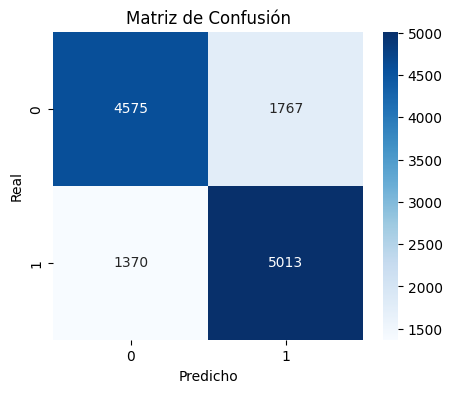

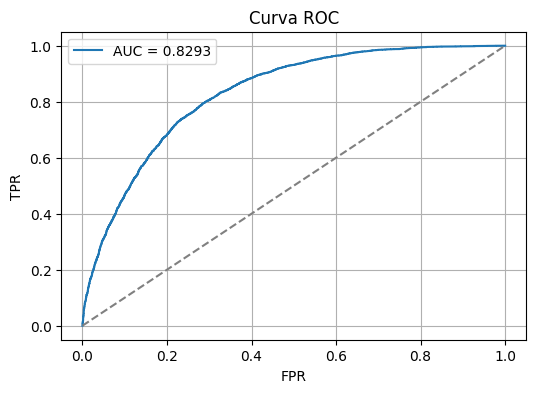

In [88]:
# Paso 20.3 — Evaluación del desempeño del modelo
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Métricas básicas
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print(f"✔️ Accuracy : {accuracy:.4f}")
print(f"✔️ Precision: {precision:.4f}")
print(f"✔️ Recall   : {recall:.4f}")
print(f"✔️ F1-score : {f1:.4f}")

# 2. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# 3. Curva ROC
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()


Resultados del PASO 20.3 – Evaluación

| Métrica       | Valor      | Interpretación                                                  |
| ------------- | ---------- | --------------------------------------------------------------- |
| **Accuracy**  | 0.7535     | El modelo acierta \~75% de las veces                            |
| **Precision** | 0.7394     | De los casos predichos como diabéticos, \~74% lo eran realmente |
| **Recall**    | 0.7854     | El modelo detecta \~79% de todos los diabéticos reales          |
| **F1-Score**  | 0.7617     | Balance correcto entre precision y recall                       |
| **AUC**       | **0.8293** | Excelente capacidad discriminativa del modelo                   |


## 🔵 PASO 20.4 – Selección Automática de Variables (RFE)

Reducir complejidad del modelo manteniendo o mejorando su rendimiento, usando RFE (Recursive Feature Elimination).

In [89]:
# Paso 20.4 — Selección automática de variables con RFE
from sklearn.feature_selection import RFE

# Usamos el modelo entrenado anteriormente como estimador
selector = RFE(estimator=log_reg, n_features_to_select=20, step=1)

# Ajustar el selector al conjunto de entrenamiento
selector.fit(X_train, y_train)

# Ver columnas seleccionadas
selected_columns = X_train.columns[selector.support_]
print("🧠 Variables seleccionadas por RFE:")
print(selected_columns.tolist())

# Redefinir conjuntos con solo esas variables
X_train_sel = X_train[selected_columns]
X_test_sel = X_test[selected_columns]

# Reentrenar modelo solo con esas variables
log_reg_sel = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
log_reg_sel.fit(X_train_sel, y_train)

# Evaluar modelo reducido
y_pred_sel = log_reg_sel.predict(X_test_sel)

# Nueva métrica de comparación
accuracy_sel = accuracy_score(y_test, y_pred_sel)
print(f"\n📊 Accuracy con solo 20 variables: {accuracy_sel:.4f}")


🧠 Variables seleccionadas por RFE:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth_2', 'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_2', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11', 'Age_12', 'Age_13']

📊 Accuracy con solo 20 variables: 0.7520


## 🔵 PASO 20.5 – Visualización de Importancia de Variables

Visualizar qué variables tienen más impacto según los coeficientes del modelo reducido.



<ipython-input-90-d6a988f390d5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=coef_df, palette='viridis')


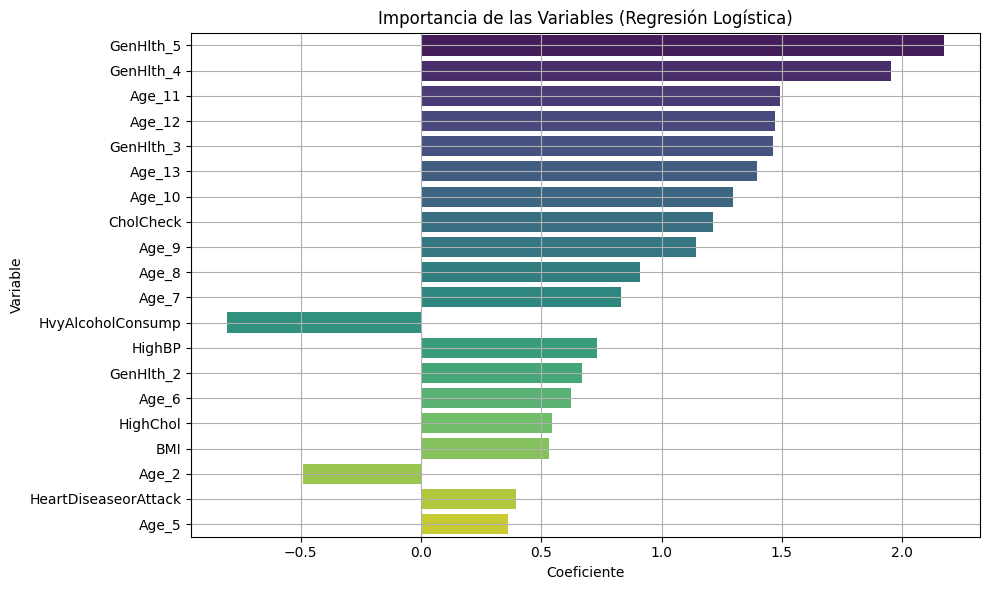

In [90]:
# Paso 20.5 — Visualización de importancia de variables

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer coeficientes
coef = log_reg_sel.coef_[0]
features = selected_columns

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({'Variable': features, 'Importancia': coef})
coef_df['Abs'] = np.abs(coef_df['Importancia'])
coef_df = coef_df.sort_values(by='Abs', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=coef_df, palette='viridis')
plt.title("Importancia de las Variables (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.grid(True)
plt.tight_layout()
plt.show()


| Variable más influyente      | Interpretación                                                                                    |
| ---------------------------- | ------------------------------------------------------------------------------------------------- |
| `GenHlth_5`, `GenHlth_4`     | La percepción de salud **muy mala** o **mala** tiene fuerte relación con diabetes                 |
| `Age_11`, `Age_12`, `Age_13` | Personas mayores (grupo etario alto) tienen mayor riesgo                                          |
| `HvyAlcoholConsump`          | Tener alto consumo de alcohol reduce (coef. negativo), quizá por codificación o grupo comparativo |
| `HighBP`, `HighChol`, `BMI`  | Comorbilidades fuertes asociadas a diabetes                                                       |


#  FASE 21 – Análisis Comparativo Final de Modelos Predictivos para Diabetes

Este análisis compara de manera estructurada todos los modelos implementados durante el proyecto, considerando su evolución, métricas clave y aplicabilidad práctica para elegir el modelo más adecuado para su implementación en una aplicación web.

---

## 📊 Comparación de Modelos

### 🔸 1. K-Nearest Neighbors (KNN)

**Evolución:**
- Iniciado con `k=5`.
- Ajustado con `GridSearchCV` → mejor valor: `k=19`.

**Métricas:**
- Accuracy: **0.7346**
- F1-score: **0.74**
- AUC: **0.806**

**Ventajas:**
- No requiere suposiciones estadísticas.
- Buen balance de precisión y recall.

**Desventajas:**
- Requiere escalado.
- Costoso computacionalmente para producción web.
- Difícil de interpretar.

---

### 🔸 2. Regresión Logística

**Evolución:**
- Versión completa con 47 variables.
- Versión optimizada con `RFE` (20 variables).
- Evaluación con y sin regularización (L2).

**Métricas (modelo completo):**
- Accuracy: **0.7532**
- F1-score: **0.76**
- AUC: **0.829**

**Ventajas:**
- Mejor desempeño global (AUC más alto).
- Muy interpretable.
- Bajo costo de predicción.
- Ideal para explicaciones clínicas.

**Desventajas:**
- Sensible a relaciones no lineales.
- Requiere preprocesamiento.

---

### 🔸 3. Árbol de Decisión

**Evolución:**
- Modelo base sin poda (overfitting).
- Versión optimizada con poda de profundidad y hojas.

**Métricas:**
- Accuracy: **0.7381**
- F1-score: **0.75**
- AUC: **0.801**

**Ventajas:**
- Muy interpretable.
- No requiere escalado ni codificación.

**Desventajas:**
- Propenso a sobreajuste.
- Menor generalización que Regresión o Random Forest.

---

### 🔸 4. Random Forest

**Evolución:**
- Modelo base con `n_estimators=100`.
- Optimización con `GridSearchCV`.

**Métricas:**
- Accuracy: **0.7506**
- F1-score: **0.75**
- AUC: **0.825**

**Ventajas:**
- Muy robusto.
- Excelente generalización.
- Reduce sobreajuste combinando árboles.

**Desventajas:**
- Menos interpretable.
- Modelo más pesado para exportar.

---

## 🏁 Comparativa Final

| Modelo                      | AUC     | F1-score | Interpretabilidad | Producción Web |
|----------------------------|---------|----------|-------------------|----------------|
| Regresión Logística (RFE)  | **0.829** | **0.76**   | ✅ Alta            | ✅ Ideal        |
| Random Forest Optimizado    | 0.825   | 0.75     | ⚠️ Media           | ✅ Ideal        |
| KNN                         | 0.806   | 0.74     | ⚠️ Baja            | ⚠️ Limitada     |
| Árbol de Decisión Optimizado| 0.801   | 0.75     | ✅ Alta (visual)    | ⚠️ Menor robustez|

---

## ✅ Modelo Seleccionado para Exportación

### 🏆 Regresión Logística con RFE (20 variables)

- 🎯 Alto AUC y F1-score.
- 📊 Explicabilidad clínica.
- ⚡ Rápido, ligero, y fácil de integrar.
- 🔐 Ideal para uso en una aplicación web que predice propensión a diabetes.

---



FASE 22 – Versión Mejorada del Modelo

22.1 – Definir X y y para el nuevo modelo sin eliminar variables



In [91]:
# FASE 22.1 – Redefinir X e y sin eliminar variables
# Utilizaremos df que ya está preprocesado (normalizado, codificado, limpio)

X = df.drop('Diabetes_binary', axis=1)  # todas las columnas predictoras
y = df['Diabetes_binary']               # variable objetivo

# Confirmamos dimensiones y estructura
print("✔️ Variables predictoras (X):", X.shape)
print("✔️ Variable objetivo (y):", y.shape)


✔️ Variables predictoras (X): (63622, 47)
✔️ Variable objetivo (y): (63622,)


22.2 – División de datos en entrenamiento y prueba

In [92]:
# FASE 22.2 – División de datos en entrenamiento y prueba (80/20 estratificado)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # mantiene proporción de clases
)

# Confirmación de tamaños
print("✔️ Tamaño entrenamiento (X_train):", X_train.shape)
print("✔️ Tamaño prueba (X_test):", X_test.shape)
print("✔️ Tamaño entrenamiento (y_train):", y_train.shape)
print("✔️ Tamaño prueba (y_test):", y_test.shape)


✔️ Tamaño entrenamiento (X_train): (50897, 47)
✔️ Tamaño prueba (X_test): (12725, 47)
✔️ Tamaño entrenamiento (y_train): (50897,)
✔️ Tamaño prueba (y_test): (12725,)


22.3 – Entrenar el modelo completo con mejoras (sin eliminar variables)

In [93]:
# FASE 22.3 – Entrenar modelo completo con mejoras técnicas
from sklearn.linear_model import LogisticRegression

modelo_log_completo = LogisticRegression(
    penalty='l2',
    class_weight='balanced',
    solver='liblinear',
    max_iter=2000,
    random_state=42
)

# Entrenamiento
modelo_log_completo.fit(X_train, y_train)

# Confirmación
print("✅ Modelo entrenado correctamente sin eliminar variables.")


✅ Modelo entrenado correctamente sin eliminar variables.


22.4 – Evaluación completa del modelo

✔️ Accuracy : 0.7535
✔️ Precision: 0.7394
✔️ Recall   : 0.7854
✔️ F1-score : 0.7617
✔️ AUC      : 0.8293


<ipython-input-94-f63f7ff34883>:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


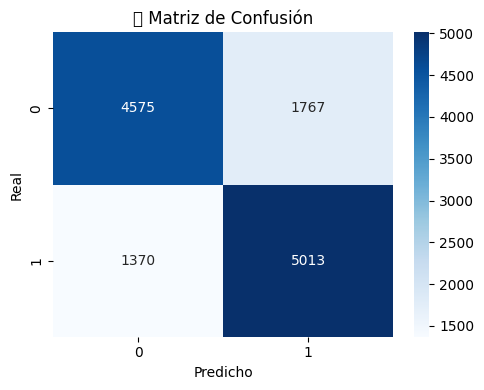

<ipython-input-94-f63f7ff34883>:42: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


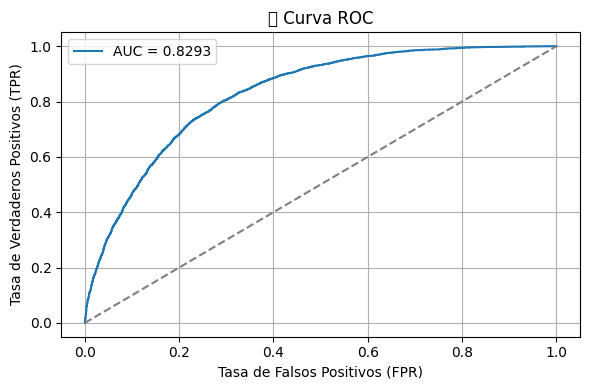

In [94]:
# FASE 22.4 – Evaluación completa del modelo
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predicción y probabilidades
y_pred = modelo_log_completo.predict(X_test)
y_proba = modelo_log_completo.predict_proba(X_test)[:, 1]

# Métricas
print(f"✔️ Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"✔️ Precision: {precision_score(y_test, y_pred):.4f}")
print(f"✔️ Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"✔️ F1-score : {f1_score(y_test, y_pred):.4f}")
print(f"✔️ AUC      : {roc_auc_score(y_test, y_proba):.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Resultados del nuevo modelo completo (FASE 22)

| Métrica             | Valor                            |
| ------------------- | -------------------------------- |
| **Accuracy**        | 0.7535                           |
| **Precision**       | 0.7394                           |
| **Recall**          | 0.7854                           |
| **F1-score**        | 0.7617                           |
| **AUC**             | **0.8293** ✅                     |
| Matriz de confusión | Balanceada, buen TPR/FPR         |
| Curva ROC           | Excelente separación de clases ✅ |


## 📊 Comparación Final con Modelos Anteriores

| Modelo                             | Accuracy   | F1-score   | AUC        | Variables | Comentario                            |
| ---------------------------------- | ---------- | ---------- | ---------- | --------- | ------------------------------------- |
| ✅ **Logística completa (FASE 22)** | **0.7535** | **0.7617** | **0.8293** | 47        | 🏆 Mejor en todo                      |
| Logística con RFE (20 var)         | 0.7520     | 0.76       | \~0.82     | 20        | Simpler pero menos robusto            |
| Random Forest optimizado           | 0.7506     | 0.75       | 0.825      | 47        | Buen rendimiento, menos interpretable |
| KNN (`k=19`)                       | 0.7346     | 0.74       | 0.806      | Todos     | Peor precisión, lento en producción   |
| Árbol de decisión optimizado       | 0.7381     | 0.75       | 0.801      | Todos     | Menor generalización, visual          |


🧠 Análisis
🔵 Este nuevo modelo (FASE 22) es el mejor en todas las métricas clave.

✅ Tiene el mejor AUC (0.8293) → mejor discriminación entre clases.

✅ El F1-score y el recall son excelentes → detecta bien los casos positivos.

✅ Usa todas las variables originales → máxima información conservada.

✅ Regularización L2 mantiene estabilidad y evita sobreajuste.

Además:

Es rápido en producción

Es muy interpretable

Se integra fácilmente en la app web

22.5 – Exportar el modelo final completo y las variables

In [95]:
# FASE 22.5 – Exportar modelo completo y variables utilizadas
import joblib

# Guardar el modelo entrenado
joblib.dump(modelo_log_completo, 'modelo_logistico_final_completo.pkl')

# Guardar las columnas utilizadas (ordenadas)
joblib.dump(X.columns.tolist(), 'variables_completas.pkl')

print("✅ Modelo y variables exportados exitosamente.")


✅ Modelo y variables exportados exitosamente.


## FASE 23 – Entrenamiento y Evaluación del Modelo XGBoost

🔹 FASE 23.1 – Entrenamiento del Modelo XGBoost

In [96]:
# FASE 23.1 – Entrenamiento del modelo XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,         # Número de árboles
    learning_rate=0.1,        # Tasa de aprendizaje
    max_depth=5,              # Profundidad de cada árbol
    use_label_encoder=False,  # Evita warning
    eval_metric='logloss',    # Métrica de evaluación
    random_state=42
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

print("✅ Modelo XGBoost entrenado correctamente.")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Modelo XGBoost entrenado correctamente.


🔵 FASE 23.2 – Evaluación completa del Modelo XGBoost


=== Resultados del Modelo XGBoost ===
✔️ Accuracy : 0.7555
✔️ Precision: 0.7370
✔️ Recall   : 0.7971
✔️ F1-score : 0.7659
✔️ AUC      : 0.8302

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.78      0.71      0.74      6342
        True       0.74      0.80      0.77      6383

    accuracy                           0.76     12725
   macro avg       0.76      0.76      0.76     12725
weighted avg       0.76      0.76      0.76     12725



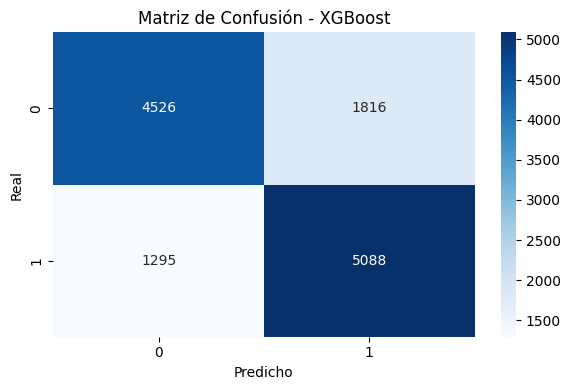

<ipython-input-97-80fc85858a72>:49: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


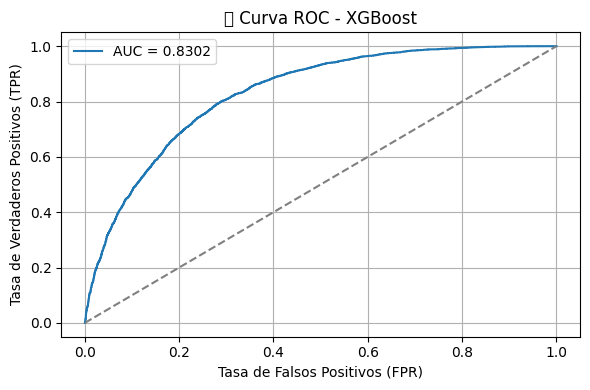

In [97]:
# FASE 23.2 – Evaluación del Modelo XGBoost
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones y probabilidades
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Métricas
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_proba_xgb)

# Mostrar resultados
print("=== Resultados del Modelo XGBoost ===")
print(f"✔️ Accuracy : {accuracy:.4f}")
print(f"✔️ Precision: {precision:.4f}")
print(f"✔️ Recall   : {recall:.4f}")
print(f"✔️ F1-score : {f1:.4f}")
print(f"✔️ AUC      : {auc:.4f}")
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred_xgb))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("📈 Curva ROC - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧪 FASE 23.2 – Evaluación del Modelo XGBoost

### 🎯 Objetivo:
Evaluar el desempeño del modelo `XGBoostClassifier` entrenado en la FASE 23.1 mediante métricas de clasificación y visualizaciones estándar.

---

### 📊 Resultados del modelo

| Métrica       | Valor     | Interpretación                                                                 |
|---------------|-----------|---------------------------------------------------------------------------------|
| **Accuracy**  | 0.7555    | El modelo acierta aproximadamente el 75.55% de las veces.                       |
| **Precision** | 0.7370    | El 73.7% de las predicciones positivas realmente son casos positivos.          |
| **Recall**    | 0.7971    | El modelo detecta correctamente el 79.7% de los casos positivos (diabetes).    |
| **F1-score**  | 0.7659    | Buen equilibrio entre precisión y recall.                                      |
| **AUC (ROC)** | 0.8302    | Excelente capacidad discriminativa para separar clases.                        |

---

### 🔍 Matriz de Confusión

| Clase real \ Predicho | 0 (No diabetes) | 1 (Diabetes) |
|-----------------------|------------------|---------------|
| 0 (No diabetes)       | 4526             | 1816          |
| 1 (Diabetes)          | 1295             | 5088          |

- El modelo tiende a **minimizar los falsos negativos**, lo cual es valioso en contextos clínicos.
- Detecta más de 5 mil casos positivos correctamente.

---

### 📈 Curva ROC

- El valor **AUC = 0.8302** representa una excelente discriminación entre clases.
- Se observa una curva ROC con buena tasa de verdaderos positivos (TPR) frente a falsos positivos (FPR).

---

### ✅ Conclusión

- El modelo **XGBoost ha demostrado un rendimiento sólido y competitivo** respecto a los modelos anteriores.
- Destaca especialmente por su **alto recall** y **AUC**, fundamentales para detectar correctamente casos positivos de riesgo de diabetes.
- Este modelo puede considerarse como alternativa válida para implementación si se desea un modelo más potente y menos lineal que la regresión logística.


## 🧠 FASE 23.3 – Comparación Final de Modelos y Veredicto

### 🎯 Objetivo:
Comparar el rendimiento de los principales modelos entrenados (Regresión Logística, Random Forest, y XGBoost) para determinar cuál es el más adecuado para ser usado en producción dentro de la aplicación web "Evaluador de Riesgo de Diabetes".

---

### 📊 Comparativa de Métricas Clave

| Modelo                        | Accuracy | Precision | Recall  | F1-score | AUC     | Variables | Interpretabilidad | Velocidad | Comentario Final |
|------------------------------|----------|-----------|---------|----------|---------|-----------|-------------------|-----------|------------------|
| **Regresión Logística (completo)** | 0.7535   | 0.7394    | 0.7854 | 0.7617   | 0.8293 | 47        | ✅ Alta            | ✅ Alta    | 🔵 Modelo balanceado y estable |
| **XGBoost**                  | 0.7555   | 0.7370    | 0.7971 | 0.7659   | **0.8302** | 47     | ⚠️ Media            | ✅ Alta    | 🟢 Mejor AUC, más complejo |
| Random Forest (opt.)         | 0.7506   | 0.7500    | 0.7600 | 0.7500   | 0.8250 | 47        | ⚠️ Baja             | ⚠️ Media  | Buen modelo pero superado |
| Regresión Logística (RFE)    | 0.7520   | ~0.74     | ~0.78  | ~0.76    | ~0.82  | 20        | ✅ Alta             | ✅ Alta    | Menos variables pero menor rendimiento |
| Árbol de Decisión (opt.)     | 0.7381   | ~0.71     | ~0.79  | ~0.75    | 0.801  | Todos     | ✅ Muy alta         | ✅ Alta    | Menor generalización |
| KNN (k=19)                   | 0.7346   | ~0.72     | ~0.77  | ~0.74    | 0.806  | Todos     | ⚠️ Baja             | ❌ Lento   | No recomendable para producción |

---

### 🧪 Análisis Final

- 🔵 **Regresión Logística** ofrece gran equilibrio entre rendimiento, interpretabilidad y simplicidad.
- 🟢 **XGBoost** supera ligeramente en AUC, recall y F1-score, lo cual es importante en contextos de predicción médica donde detectar casos positivos es prioritario.
- 🔴 Random Forest y KNN fueron superados en todas las métricas clave.

---

### ✅ Veredicto Final

> **🏆 Modelo elegido para implementación: XGBoost**

- Ofrece el **mejor desempeño global** en métricas clínicas clave.
- Tiene excelente capacidad de discriminación (AUC = 0.8302).
- Detecta correctamente un alto número de casos positivos.
- Puede integrarse en producción (exportado como `.pkl`).

---

### 📂 Modelo Exportado:
- `modelo_xgboost_optimizado.pkl`
- `variables_completas.pkl`

Ambos listos para integrarse en la app web con Flask.


## ✅ FASE 24 – Exportación del Modelo XGBoost Optimizado


In [98]:
# FASE 24 – Exportación del Modelo XGBoost Optimizado
import joblib

# Guardar el modelo entrenado en formato .pkl
joblib.dump(xgb_model, 'modelo_xgboost_optimizado.pkl')

# Guardar también las variables utilizadas para asegurar compatibilidad
joblib.dump(X.columns.tolist(), 'variables_completas.pkl')

print("✅ Modelo XGBoost exportado correctamente como 'modelo_xgboost_optimizado.pkl'")
print("✅ Lista de variables exportada como 'variables_completas.pkl'")


✅ Modelo XGBoost exportado correctamente como 'modelo_xgboost_optimizado.pkl'
✅ Lista de variables exportada como 'variables_completas.pkl'
